In [2]:
# Import libraries
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Load JSON data
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

file_path = r"C:\Users\Tianlung\PycharmProjects\pythonProject1\MC3_release\MC3_graph.json"  # Replace with your file path
data = load_json(file_path)

# Convert to DataFrames
nodes_df = pd.DataFrame(data['nodes'])
edges_df = pd.DataFrame(data['edges'])

# Display previews
print("Nodes DataFrame Preview:")
display(nodes_df.head(2))
print("\nEdges DataFrame Preview:")
display(edges_df.head(2))

Nodes DataFrame Preview:


type  label   name sub_type     id timestamp monitoring_type findings  \
0  Entity    Sam    Sam   Person    Sam       NaN             NaN      NaN   
1  Entity  Kelly  Kelly   Person  Kelly       NaN             NaN      NaN   

  content assessment_type  ... friendship_type permission_type start_date  \
0     NaN             NaN  ...             NaN             NaN        NaN   
1     NaN             NaN  ...             NaN             NaN        NaN   

  end_date report_type submission_date  jurisdiction_type authority_level  \
0      NaN         NaN             NaN                NaN             NaN   
1      NaN         NaN             NaN                NaN             NaN   

  coordination_type operational_role  
0               NaN              NaN  
1               NaN              NaN  

[2 rows x 31 columns]


Edges DataFrame Preview:


id  is_inferred source                       target  type
0  2         True    Sam  Relationship_Suspicious_217   NaN
1  3        False    Sam      Event_Communication_370  sent

C:\Users\Tianlung\AppData\Local\Temp\ipykernel_1288\20484410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


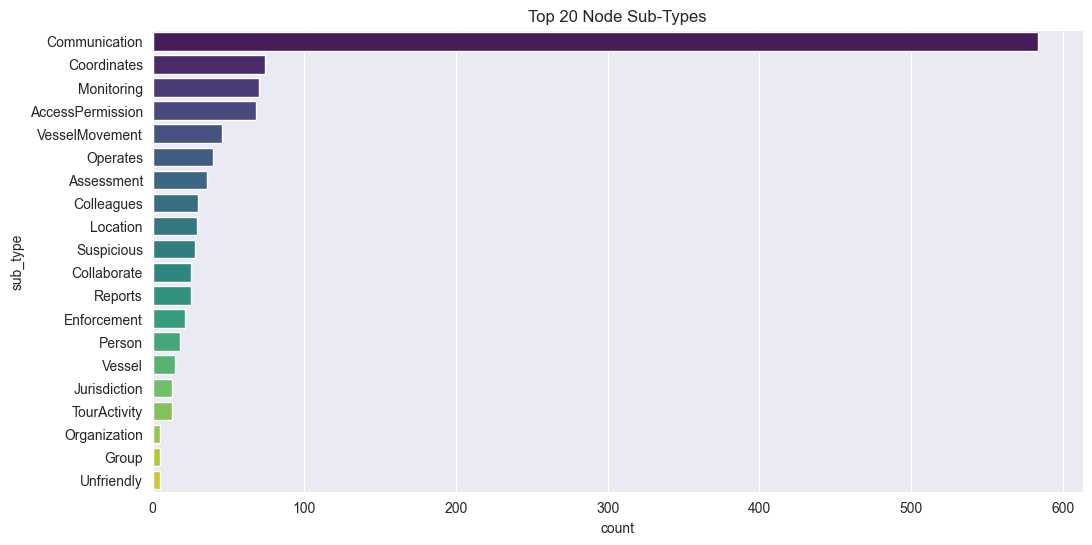

C:\Users\Tianlung\AppData\Local\Temp\ipykernel_1288\20484410.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


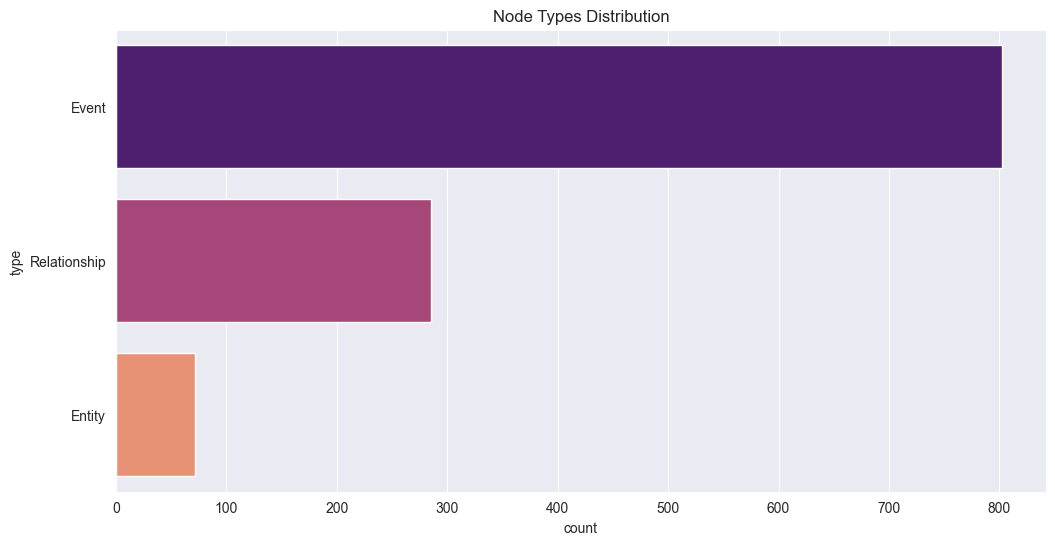

In [3]:
# Plot top node subtypes
plt.figure(figsize=(12, 6))
sns.countplot(
    y='sub_type',
    data=nodes_df,
    order=nodes_df['sub_type'].value_counts().iloc[:20].index,
    palette='viridis'
)
plt.title('Top 20 Node Sub-Types')
plt.show()

# Plot node types (if different from subtypes)
plt.figure(figsize=(12, 6))
sns.countplot(
    y='type',
    data=nodes_df,
    order=nodes_df['type'].value_counts().iloc[:10].index,
    palette='magma'
)
plt.title('Node Types Distribution')
plt.show()

In [4]:
# Create graph
G = nx.Graph()
G.add_nodes_from(nodes_df['id'].tolist())
G.add_edges_from([(e['source'], e['target']) for _, e in edges_df.iterrows()])

# Basic stats
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {sum(dict(G.degree()).values()) / len(G):.2f}")
print(f"Connected components: {nx.number_connected_components(G)}")

Number of nodes: 1159
Number of edges: 3195
Average degree: 5.51
Connected components: 1


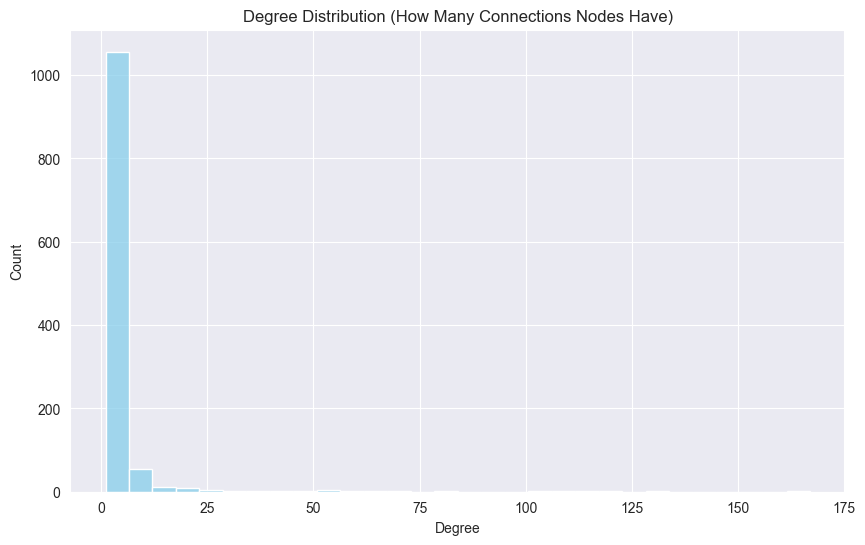

Nodes with degree 1: 7
Nodes with degree >=3: 1054


In [5]:
# Degree histogram
degrees = [d for _, d in G.degree()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, bins=30, kde=False, color='skyblue')
plt.title('Degree Distribution (How Many Connections Nodes Have)')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

# Nodes with 1 vs. 3+ connections
print(f"Nodes with degree 1: {sum(1 for _, d in G.degree() if d == 1)}")
print(f"Nodes with degree >=3: {sum(1 for _, d in G.degree() if d >= 3)}")

C:\Users\Tianlung\AppData\Local\Temp\ipykernel_1288\26964840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Degree', y='Entity', data=top_df, palette='rocket')


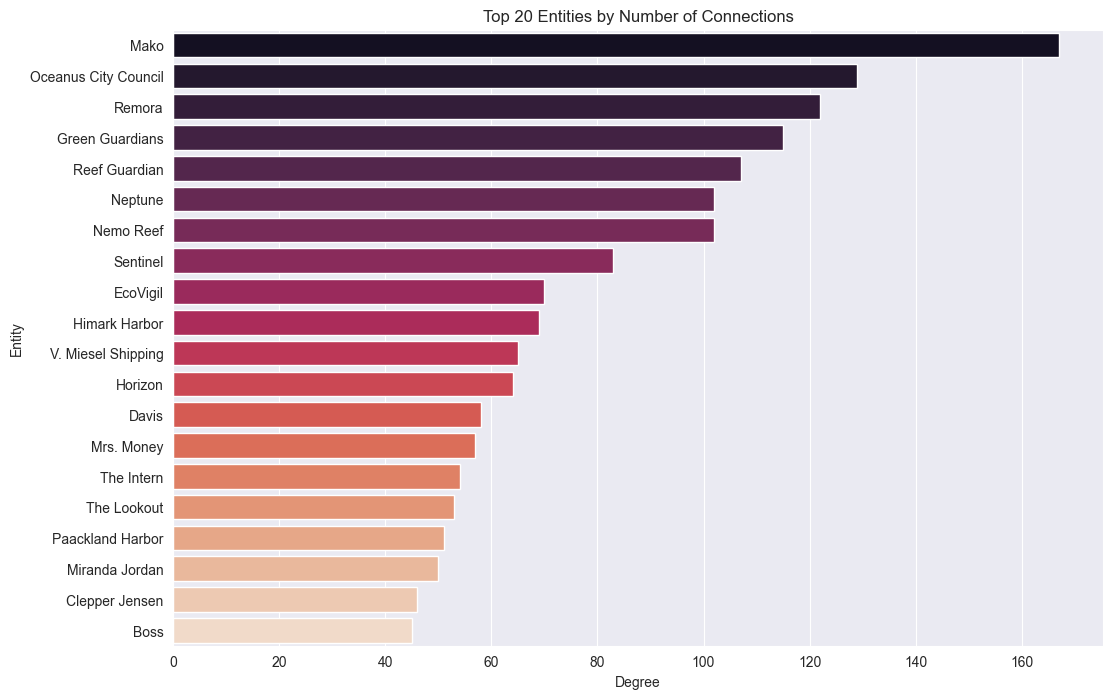

In [6]:
# Top 20 most connected nodes
top_entities = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:20]
top_df = pd.DataFrame(top_entities, columns=['Entity', 'Degree'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Degree', y='Entity', data=top_df, palette='rocket')
plt.title('Top 20 Entities by Number of Connections')
plt.show()

C:\Users\Tianlung\AppData\Local\Temp\ipykernel_1288\2518961780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


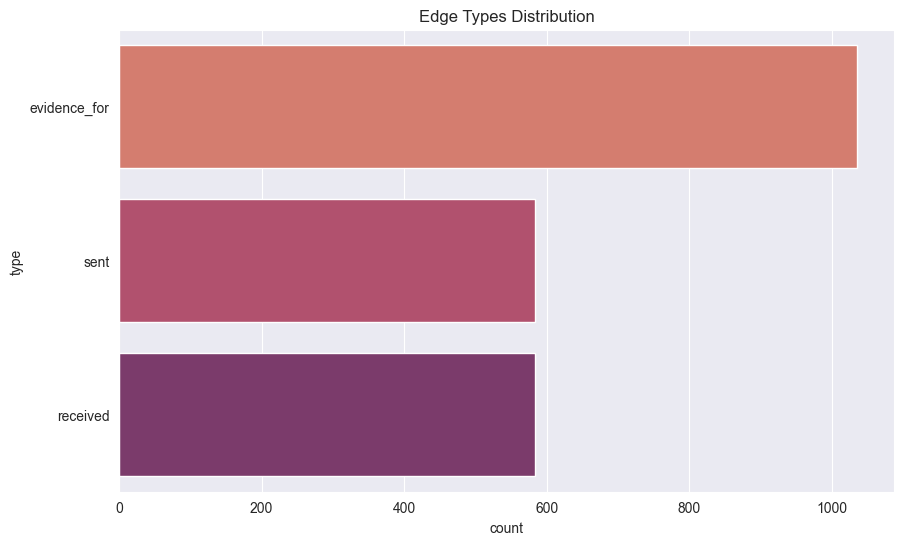

C:\Users\Tianlung\AppData\Local\Temp\ipykernel_1288\2518961780.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_inferred', data=edges_df, palette='pastel')


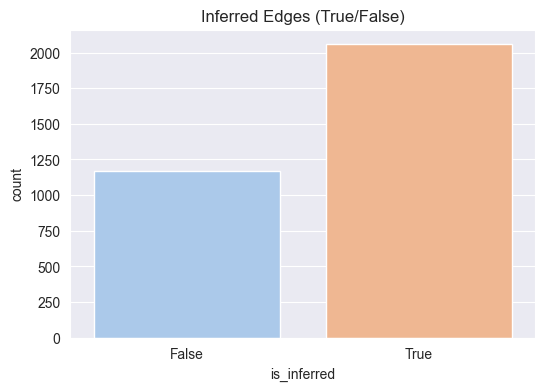

In [7]:
# Edge type distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    y='type',
    data=edges_df,
    order=edges_df['type'].value_counts().index,
    palette='flare'
)
plt.title('Edge Types Distribution')
plt.show()

# Inferred edges (if column exists)
if 'is_inferred' in edges_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='is_inferred', data=edges_df, palette='pastel')
    plt.title('Inferred Edges (True/False)')
    plt.show()

In [8]:
edges_df


id  is_inferred                       source  \
0        2         True                          Sam   
1        3        False                          Sam   
2        5         True                          Sam   
3     3013         True                          Sam   
4      NaN         True                          Sam   
...    ...          ...                          ...   
3221  2246         True  Relationship_Unfriendly_130   
3222  2643         True  Relationship_Unfriendly_229   
3223  3014         True  Relationship_Unfriendly_312   
3224  4034         True  Relationship_Unfriendly_567   
3225  3992         True  Relationship_Unfriendly_625   

                           target  type  
0     Relationship_Suspicious_217   NaN  
1         Event_Communication_370  sent  
2            Event_Assessment_600   NaN  
3     Relationship_Colleagues_430   NaN  
4        Relationship_Friends_272   NaN  
...                           ...   ...  
3221              Green Guardians   NaN  
3222         Oceanus City Council   NaN  
3223                         Mako   NaN  
3224         Oceanus City Council   NaN  
3225              Green Guardians   NaN  

[3226 rows x 5 columns]

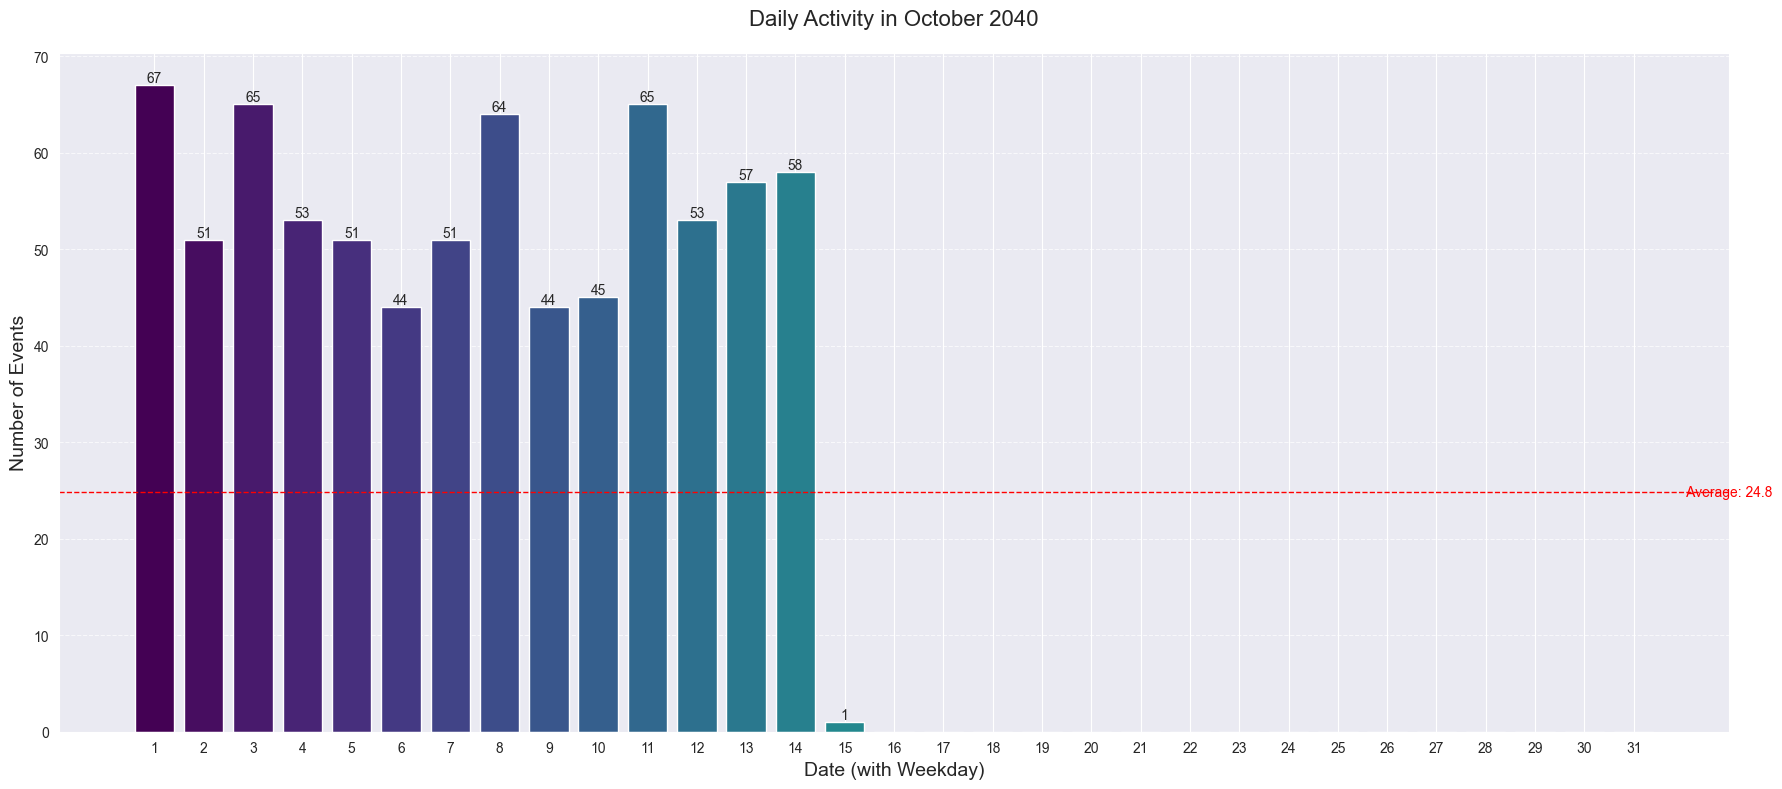


October 2040 Statistics:
Total events: 769
Busiest day: Day 1 (67 events)
Quietest day: Day 16 (0 events)
Days with no activity: 16


In [9]:
if 'timestamp' in nodes_df.columns:
    # Convert to datetime and filter for October 2040
    nodes_df['timestamp'] = pd.to_datetime(nodes_df['timestamp'], errors='coerce')
    october_data = nodes_df[
        (nodes_df['timestamp'].dt.year == 2040) &
        (nodes_df['timestamp'].dt.month == 10)
    ].copy()

    if not october_data.empty:
        # Extract day and weekday name
        october_data['day'] = october_data['timestamp'].dt.day
        october_data['weekday'] = october_data['timestamp'].dt.day_name()

        # Get daily counts
        daily_counts = october_data['day'].value_counts().sort_index()

        # Ensure all days are represented (1-31)
        daily_counts = daily_counts.reindex(range(1, 32), fill_value=0)

        # Create figure with larger size
        plt.figure(figsize=(18, 8))

        # Create bar plot with color gradient
        bars = plt.bar(daily_counts.index, daily_counts.values,
                      color=plt.cm.viridis(np.linspace(0, 1, 31)),
                      width=0.8)

        # Add weekday labels below dates
        ax = plt.gca()
        ax.set_xticks(daily_counts.index)


        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}',
                        ha='center', va='bottom')

        # Customize plot
        plt.title('Daily Activity in October 2040', fontsize=16, pad=20)
        plt.xlabel('Date (with Weekday)', fontsize=14)
        plt.ylabel('Number of Events', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Add horizontal line for average
        avg = daily_counts.mean()
        plt.axhline(avg, color='red', linestyle='--', linewidth=1)
        plt.text(32, avg, f' Average: {avg:.1f}', va='center', ha='left', color='red')

        plt.tight_layout()
        plt.show()

        # Print some statistics
        print(f"\nOctober 2040 Statistics:")
        print(f"Total events: {daily_counts.sum()}")
        print(f"Busiest day: Day {daily_counts.idxmax()} ({daily_counts.max()} events)")
        print(f"Quietest day: Day {daily_counts.idxmin()} ({daily_counts.min()} events)")
        print(f"Days with no activity: {sum(daily_counts == 0)}")

    else:
        print("No data found for October 2040.")
else:
    print("Column 'timestamp' not found in the data.")

In [10]:
print(nodes_df['type'].unique())  # Should include 'Relationship'

['Entity' 'Event' 'Relationship']


Found 769 events in October 2040
Found 1142 entity-event connections


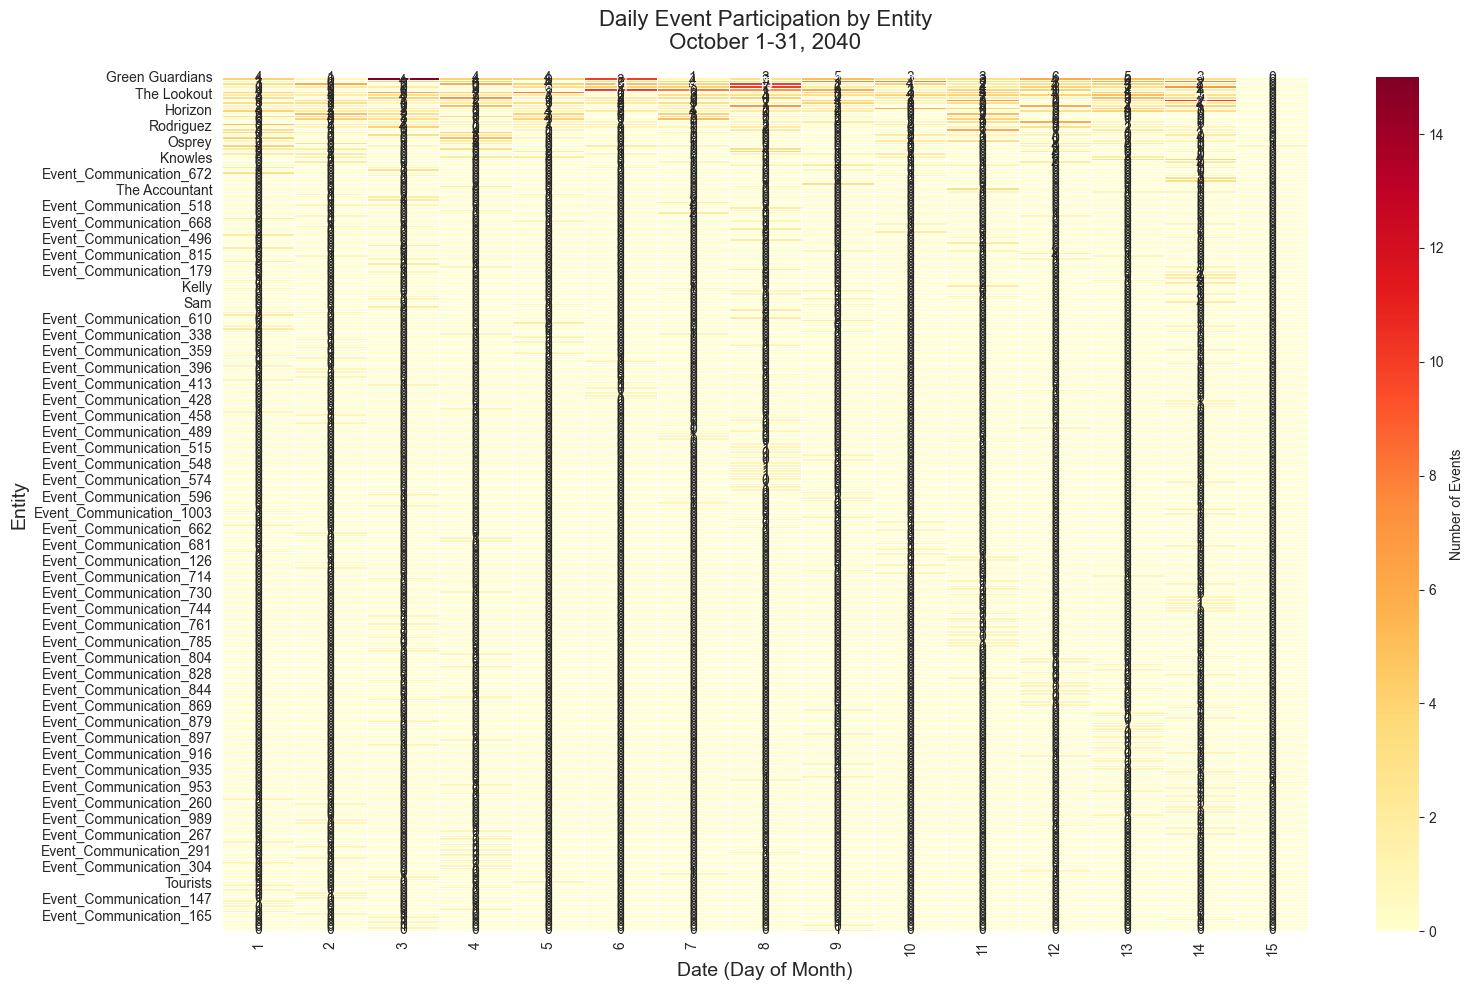


Participation Summary:
Entities with participation: 318
Active dates: 15
Most active date: Day 14 (118 events)
Most active entity: 'Green Guardians' (67 events)


In [11]:
# Daily event participation per entity (updated for your edge types)
if all(col in nodes_df.columns for col in ['timestamp', 'id']):
    try:
        # Convert timestamp and filter for October 2040
        nodes_df['date'] = pd.to_datetime(nodes_df['timestamp']).dt.date
        oct_data = nodes_df[
            (nodes_df['timestamp'].dt.to_period('M') == '2040-10') &
            (nodes_df['type'] == 'Event')  # Only include Event nodes
        ].copy()

        if not oct_data.empty:
            print(f"Found {len(oct_data)} events in October 2040")

            # Get entity-event connections (using any edge type)
            entity_events = pd.merge(
                edges_df,
                oct_data[['id', 'date']],
                left_on='target',
                right_on='id',
                how='inner'
            )

            if not entity_events.empty:
                print(f"Found {len(entity_events)} entity-event connections")

                # Create participation matrix
                participation = entity_events.groupby(['source', 'date']).size().unstack(fill_value=0)

                # Sort by most active entities
                participation = participation.loc[participation.sum(axis=1).sort_values(ascending=False).index]

                if not participation.empty:
                    # Visualize as heatmap
                    plt.figure(figsize=(16, min(10, len(participation)*0.3)))
                    sns.heatmap(
                        participation,
                        cmap='YlOrRd',
                        annot=True,
                        fmt='g',
                        linewidths=0.5,
                        cbar_kws={'label': 'Number of Events'}
                    )

                    plt.title('Daily Event Participation by Entity\nOctober 1-31, 2040', fontsize=16, pad=20)
                    plt.xlabel('Date (Day of Month)', fontsize=14)
                    plt.ylabel('Entity', fontsize=14)
                    plt.yticks(rotation=0)

                    # Format dates as simple day numbers
                    ax = plt.gca()
                    ax.set_xticklabels([d.day for d in participation.columns])

                    plt.tight_layout()
                    plt.show()

                    # Print statistics
                    print("\nParticipation Summary:")
                    print(f"Entities with participation: {len(participation)}")
                    print(f"Active dates: {len(participation.columns)}")
                    print(f"Most active date: Day {participation.sum().idxmax().day} ({participation.sum().max()} events)")
                    print(f"Most active entity: '{participation.sum(axis=1).idxmax()}' ({participation.sum(axis=1).max()} events)")
                else:
                    print("No valid participation data after processing")
            else:
                print("No entity-event connections found in October 2040 data")
        else:
            print("No October 2040 events found in the data")
    except Exception as e:
        print(f"Error processing data: {str(e)}")
else:
    print("Required columns ('timestamp' or 'id') not found in nodes DataFrame")

<Figure size 1400x800 with 0 Axes>

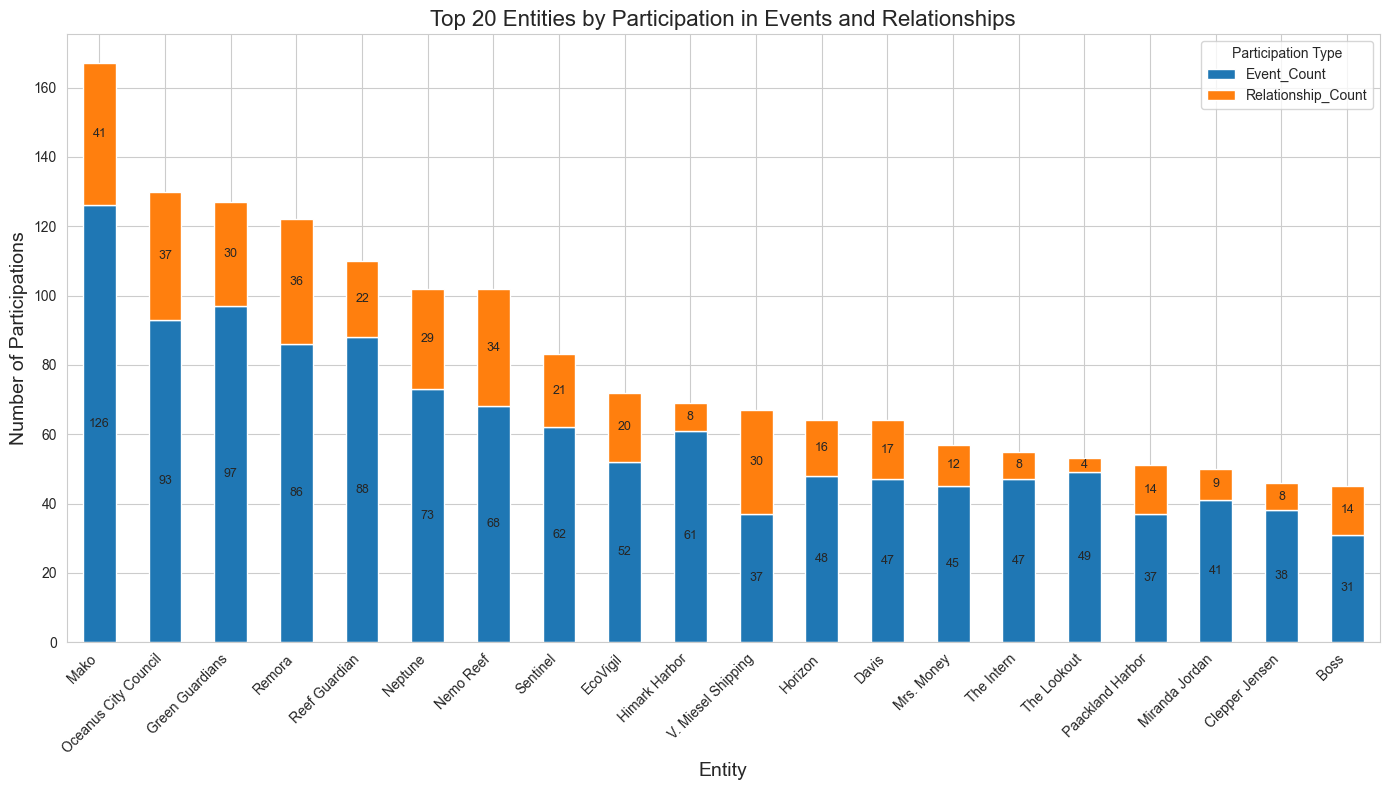


Participation Statistics:
Total entities analyzed: 72
Entities with no participations: 0
Most active entity: Mako (167 total participations)
Average participations per entity: 30.4


In [12]:
# Filter for Entity nodes only
entities = nodes_df[nodes_df['type'] == 'Entity']['id'].tolist()

# Count Event and Relationship participations for each entity
participation_counts = []

for entity in entities:
    # Count Events (where entity is source or target)
    event_count = len(edges_df[
        (edges_df['source'] == entity) & (edges_df['target'].isin(nodes_df[nodes_df['type'] == 'Event']['id'])) |
        (edges_df['target'] == entity) & (edges_df['source'].isin(nodes_df[nodes_df['type'] == 'Event']['id']))
    ])

    # Count Relationships (where entity is source or target)
    rel_count = len(edges_df[
        (edges_df['source'] == entity) & (edges_df['target'].isin(nodes_df[nodes_df['type'] == 'Relationship']['id'])) |
        (edges_df['target'] == entity) & (edges_df['source'].isin(nodes_df[nodes_df['type'] == 'Relationship']['id']))
    ])

    participation_counts.append({
        'Entity': entity,
        'Event_Count': event_count,
        'Relationship_Count': rel_count,
        'Total': event_count + rel_count
    })

# Convert to DataFrame and sort
participation_df = pd.DataFrame(participation_counts).sort_values('Total', ascending=False)

# Visualize top entities
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot stacked bars
ax = participation_df.head(20).plot(
    x='Entity',
    y=['Event_Count', 'Relationship_Count'],
    kind='bar',
    stacked=True,
    color=['#1f77b4', '#ff7f0e'],
    figsize=(14, 8)
)

plt.title('Top 20 Entities by Participation in Events and Relationships', fontsize=16)
plt.xlabel('Entity', fontsize=14)
plt.ylabel('Number of Participations', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Participation Type')

# Add value labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:
        x, y = p.get_xy()
        ax.annotate(
            f'{int(height)}',
            (x + width/2, y + height/2),
            ha='center',
            va='center',
            fontsize=9
        )

plt.tight_layout()
plt.show()

# Print summary stats
print("\nParticipation Statistics:")
print(f"Total entities analyzed: {len(participation_df)}")
print(f"Entities with no participations: {len(participation_df[participation_df['Total'] == 0])}")
print(f"Most active entity: {participation_df.iloc[0]['Entity']} "
      f"({participation_df.iloc[0]['Total']} total participations)")
print(f"Average participations per entity: {participation_df['Total'].mean():.1f}")

In [20]:
edges_df

id  is_inferred                       source  \
0        2         True                          Sam   
1        3        False                          Sam   
2        5         True                          Sam   
3     3013         True                          Sam   
4      NaN         True                          Sam   
...    ...          ...                          ...   
3221  2246         True  Relationship_Unfriendly_130   
3222  2643         True  Relationship_Unfriendly_229   
3223  3014         True  Relationship_Unfriendly_312   
3224  4034         True  Relationship_Unfriendly_567   
3225  3992         True  Relationship_Unfriendly_625   

                           target  type  
0     Relationship_Suspicious_217   NaN  
1         Event_Communication_370  sent  
2            Event_Assessment_600   NaN  
3     Relationship_Colleagues_430   NaN  
4        Relationship_Friends_272   NaN  
...                           ...   ...  
3221              Green Guardians   NaN  
3222         Oceanus City Council   NaN  
3223                         Mako   NaN  
3224         Oceanus City Council   NaN  
3225              Green Guardians   NaN  

[3226 rows x 5 columns]

In [22]:
nodes_df[nodes_df["id"] == "Relationship_Suspicious_217"]

type       label name    sub_type                           id  \
1137  Relationship  Suspicious  NaN  Suspicious  Relationship_Suspicious_217   

     timestamp monitoring_type findings content assessment_type  ...  \
1137       NaT             NaN      NaN     NaN             NaN  ...   

     friendship_type permission_type start_date end_date report_type  \
1137             NaN             NaN        NaN      NaN         NaN   

     submission_date  jurisdiction_type authority_level coordination_type  \
1137             NaN                NaN             NaN               NaN   

     operational_role  
1137              NaN  

[1 rows x 31 columns]

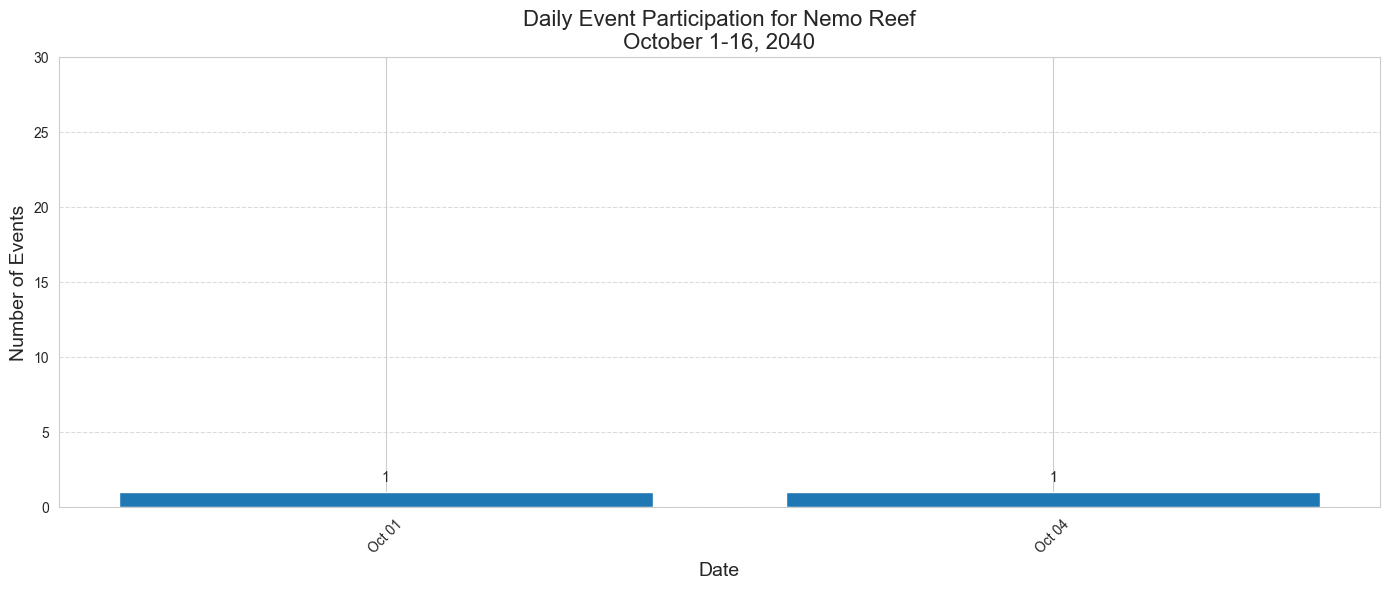


Nemo Reef Participation Summary:
Total Events in period: 2
Total Relationships: 102
Busiest day: Oct 01 (1 events)
--------------------------------------------------


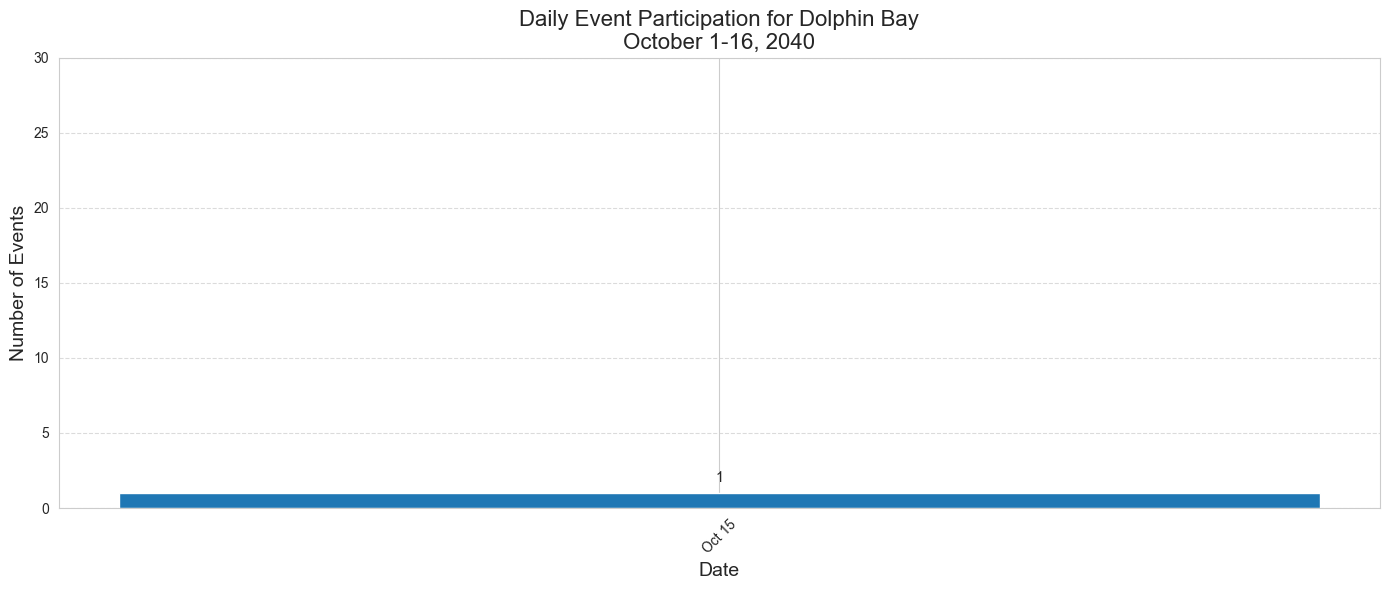


Dolphin Bay Participation Summary:
Total Events in period: 1
Total Relationships: 5
Busiest day: Oct 15 (1 events)
--------------------------------------------------


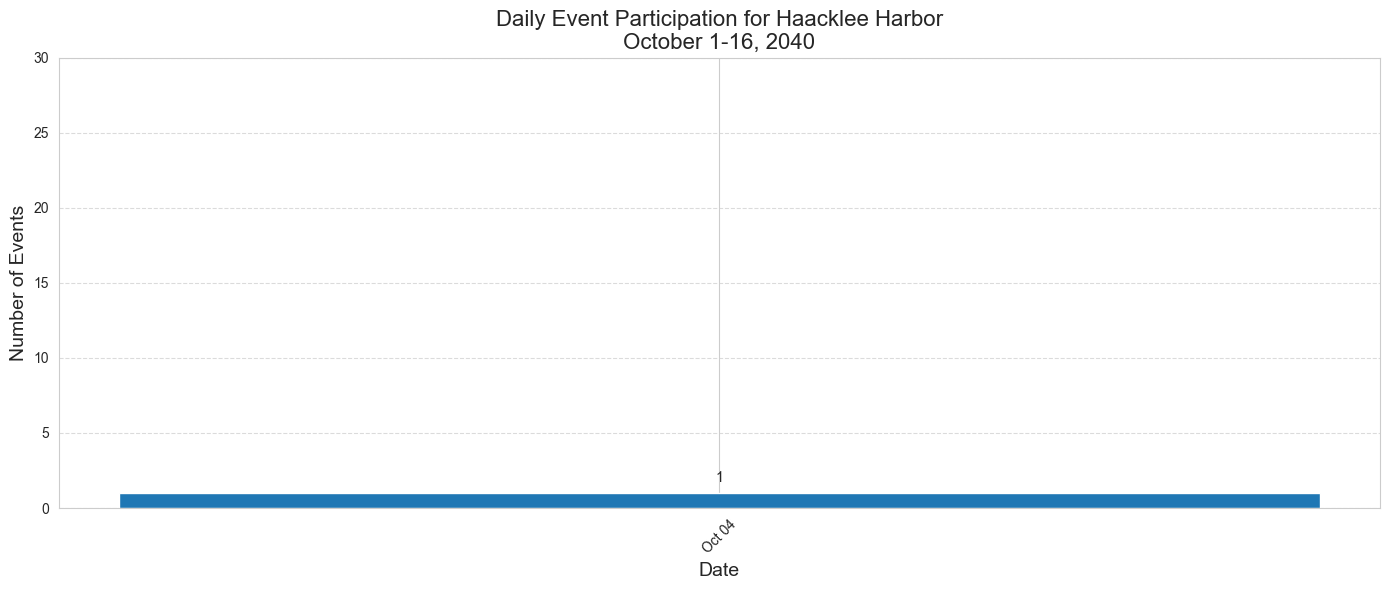


Haacklee Harbor Participation Summary:
Total Events in period: 1
Total Relationships: 16
Busiest day: Oct 04 (1 events)
--------------------------------------------------


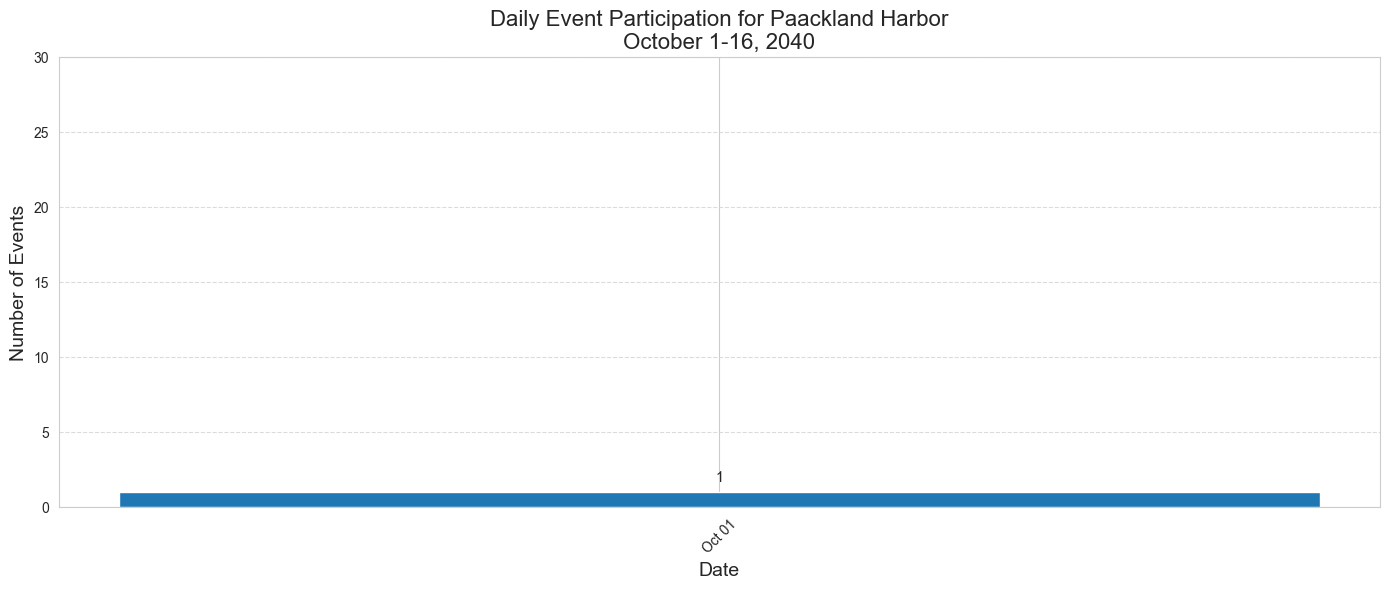


Paackland Harbor Participation Summary:
Total Events in period: 1
Total Relationships: 51
Busiest day: Oct 01 (1 events)
--------------------------------------------------


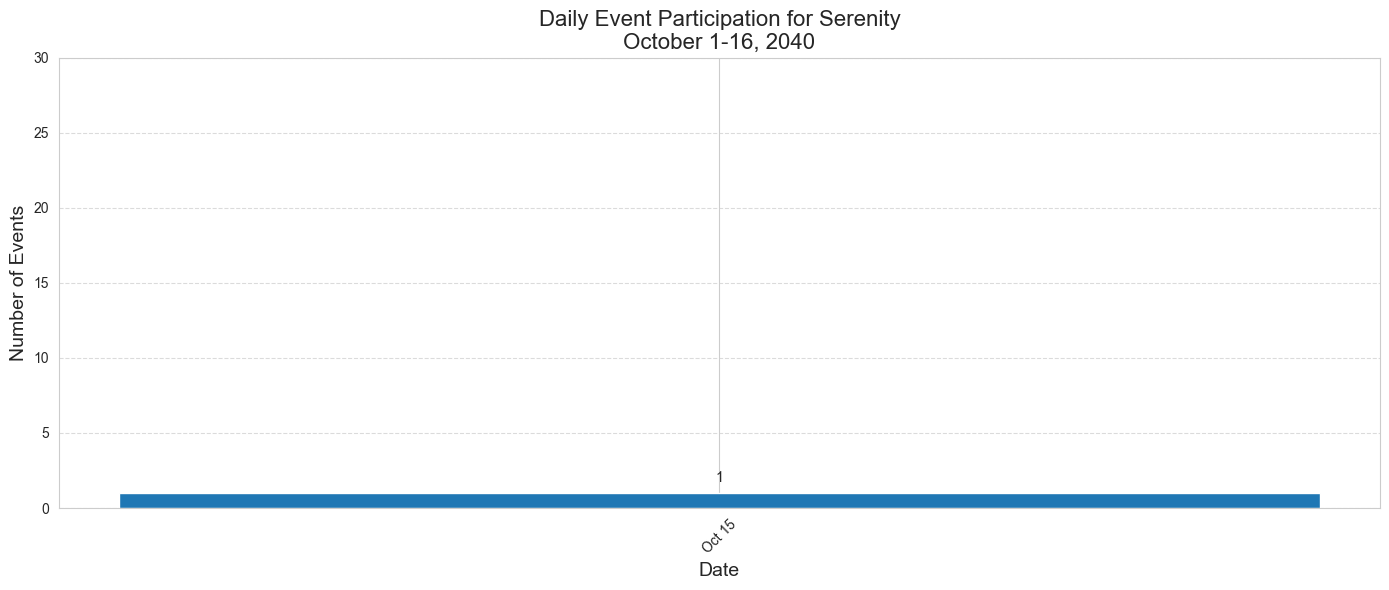


Serenity Participation Summary:
Total Events in period: 1
Total Relationships: 26
Busiest day: Oct 15 (1 events)
--------------------------------------------------


In [24]:
# Ensure we have the required columns
if all(col in nodes_df.columns for col in ['timestamp', 'id', 'type']):
    try:
        # Convert timestamp to datetime (handling errors)
        nodes_df['date'] = pd.to_datetime(nodes_df['timestamp'], errors='coerce')

        # Define our fixed date range (Oct 1-16, 2040)
        date_range = pd.date_range('2040-10-01', '2040-10-16')

        # Filter for our date range and valid dates
        oct_data = nodes_df[
            (nodes_df['date'].isin(date_range)) &
            (nodes_df['type'] == 'Event')  # Only include Events for the graph
        ].copy()

        # Get all Entity nodes
        entities = nodes_df[nodes_df['type'] == 'Entity']['id'].unique()

        # Create dictionaries to store relationship counts
        relationship_counts = {entity: 0 for entity in entities}

        # Count relationships for each entity (all edges where entity is involved)
        for _, edge in edges_df.iterrows():
            if edge['source'] in entities:
                relationship_counts[edge['source']] += 1
            if edge['target'] in entities:
                relationship_counts[edge['target']] += 1

        # Create dataframe for event participation
        participation_data = []

        # Collect event participation data
        for entity in entities:
            # Get all edges where entity is connected to an Event
            entity_events = edges_df[
                ((edges_df['source'] == entity) & (edges_df['target'].isin(oct_data['id']))) |
                ((edges_df['target'] == entity) & (edges_df['source'].isin(oct_data['id'])))
            ]

            for _, edge in entity_events.iterrows():
                event_id = edge['target'] if edge['source'] == entity else edge['source']
                event_date = oct_data.loc[oct_data['id'] == event_id, 'date'].values[0]
                participation_data.append({
                    'Entity': entity,
                    'Date': pd.to_datetime(event_date).date(),
                    'Count': 1
                })

        if participation_data:
            # Create DataFrame
            participation_df = pd.DataFrame(participation_data)

            # Pivot table for event counts (including all dates in our range)
            all_dates = [d.date() for d in date_range]
            daily_counts = participation_df.pivot_table(
                index=['Entity', 'Date'],
                values='Count',
                aggfunc='sum',
                fill_value=0
            ).reindex(all_dates, level=1, fill_value=0).reset_index()

            # Only show entities with event participation
            active_entities = daily_counts.groupby('Entity')['Count'].sum().sort_values(ascending=False).index

            # Visualize each entity
            for entity in active_entities[:10]:  # Show first 10 entities
                entity_data = daily_counts[daily_counts['Entity'] == entity].sort_values('Date')

                # Prepare x-axis labels (Oct 1 - Oct 16)
                date_labels = [d.strftime('Oct %d') for d in entity_data['Date']]

                plt.figure(figsize=(14, 6))

                # Plot event bars (blue)
                events_bars = plt.bar(
                    x=range(len(date_labels)),
                    height=entity_data['Count'],
                    width=0.8,
                    color='#1f77b4',
                    label='Events'
                )

                plt.title(f'Daily Event Participation for {entity}\nOctober 1-16, 2040', fontsize=16)
                plt.xlabel('Date', fontsize=14)
                plt.ylabel('Number of Events', fontsize=14)
                plt.xticks(range(len(date_labels)), date_labels, rotation=45)
                plt.ylim(0, 30)  # Fixed y-axis from 0-30
                plt.grid(axis='y', linestyle='--', alpha=0.7)

                # Add value labels
                for bar in events_bars:
                    height = bar.get_height()
                    if height > 0:
                        plt.text(bar.get_x() + bar.get_width()/2,
                                height + 0.5,
                                str(int(height)),
                                ha='center',
                                va='bottom',
                                fontsize=10)

                plt.tight_layout()
                plt.show()

                # Print summary including relationship count
                print(f"\n{entity} Participation Summary:")
                print(f"Total Events in period: {entity_data['Count'].sum()}")
                print(f"Total Relationships: {relationship_counts[entity]}")
                if entity_data['Count'].sum() > 0:
                    max_day = entity_data.loc[entity_data['Count'].idxmax(), 'Date'].strftime('Oct %d')
                    print(f"Busiest day: {max_day} ({entity_data['Count'].max()} events)")
                print("-" * 50)
        else:
            print("No event participations found in October 1-16, 2040")

    except Exception as e:
        print(f"Error processing data: {str(e)}")
        raise  # Re-raise the error to see full traceback
else:
    print("Required columns ('timestamp', 'id', or 'type') not found in nodes DataFrame")

<Figure size 1400x600 with 0 Axes>

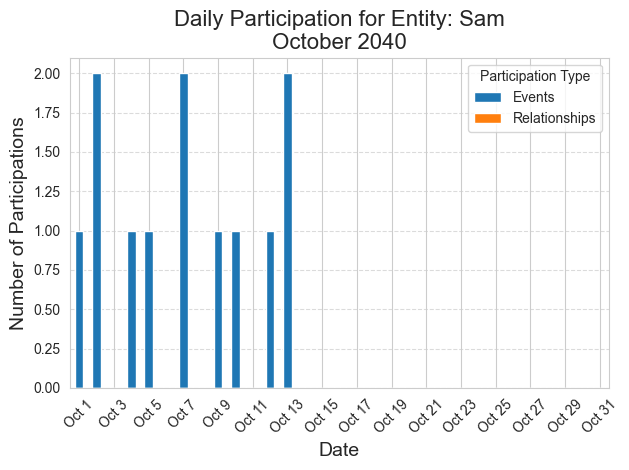


Entity Sam Summary:
Total Event participations: 12
Total Relationship participations: 0
Most active day: Oct 2 (2 participations)


<Figure size 1400x600 with 0 Axes>

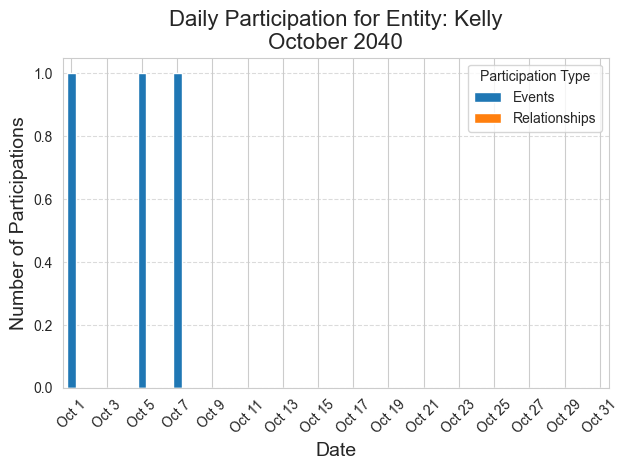


Entity Kelly Summary:
Total Event participations: 3
Total Relationship participations: 0
Most active day: Oct 1 (1 participations)


<Figure size 1400x600 with 0 Axes>

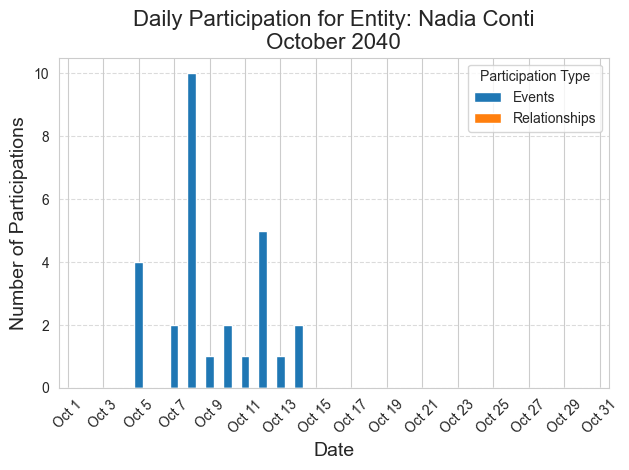


Entity Nadia Conti Summary:
Total Event participations: 28
Total Relationship participations: 0
Most active day: Oct 8 (10 participations)


<Figure size 1400x600 with 0 Axes>

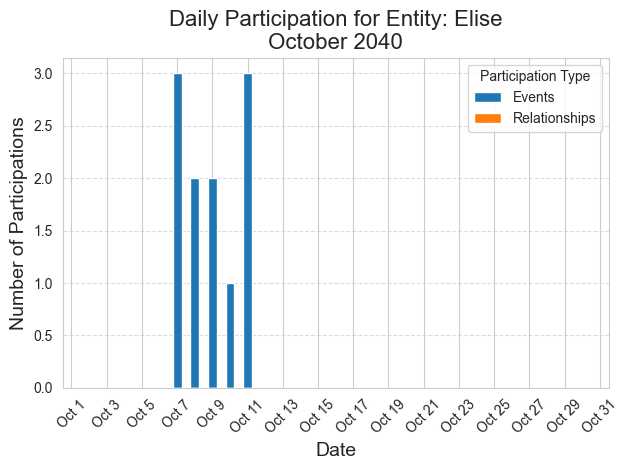


Entity Elise Summary:
Total Event participations: 11
Total Relationship participations: 0
Most active day: Oct 7 (3 participations)


<Figure size 1400x600 with 0 Axes>

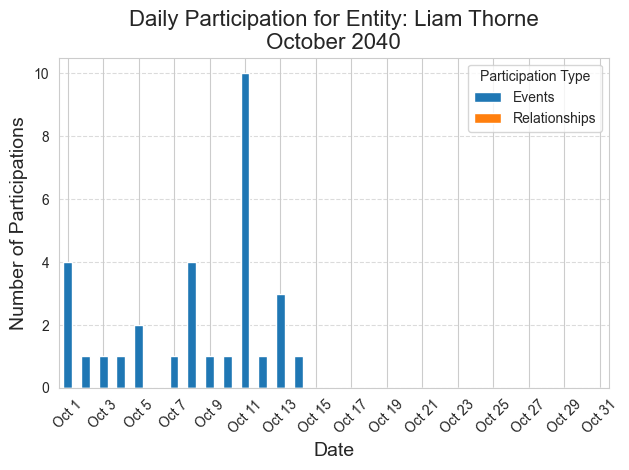


Entity Liam Thorne Summary:
Total Event participations: 31
Total Relationship participations: 0
Most active day: Oct 11 (10 participations)


<Figure size 1400x600 with 0 Axes>

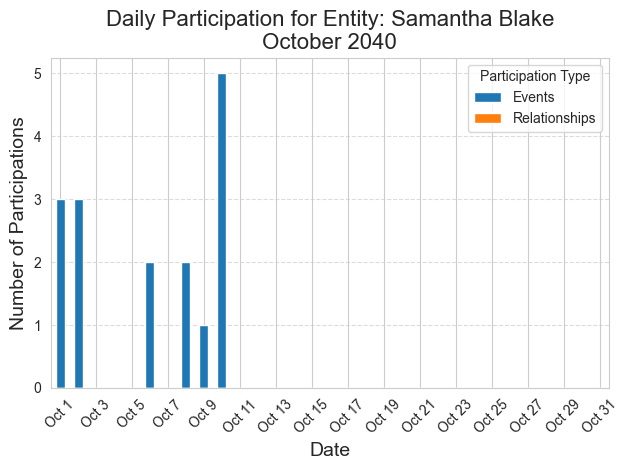


Entity Samantha Blake Summary:
Total Event participations: 16
Total Relationship participations: 0
Most active day: Oct 10 (5 participations)


<Figure size 1400x600 with 0 Axes>

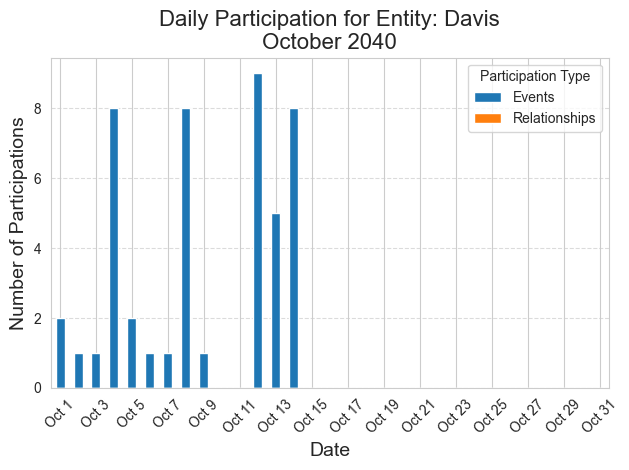


Entity Davis Summary:
Total Event participations: 47
Total Relationship participations: 0
Most active day: Oct 12 (9 participations)


<Figure size 1400x600 with 0 Axes>

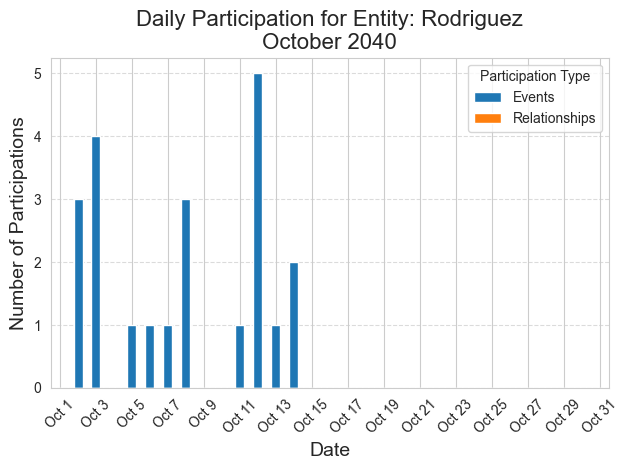


Entity Rodriguez Summary:
Total Event participations: 22
Total Relationship participations: 0
Most active day: Oct 12 (5 participations)


<Figure size 1400x600 with 0 Axes>

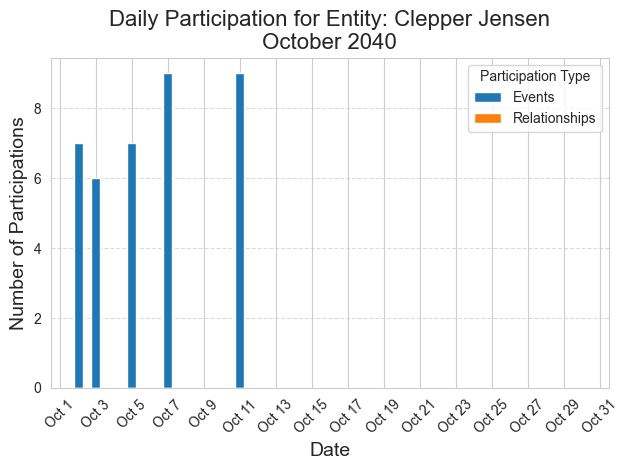


Entity Clepper Jensen Summary:
Total Event participations: 38
Total Relationship participations: 0
Most active day: Oct 7 (9 participations)


<Figure size 1400x600 with 0 Axes>

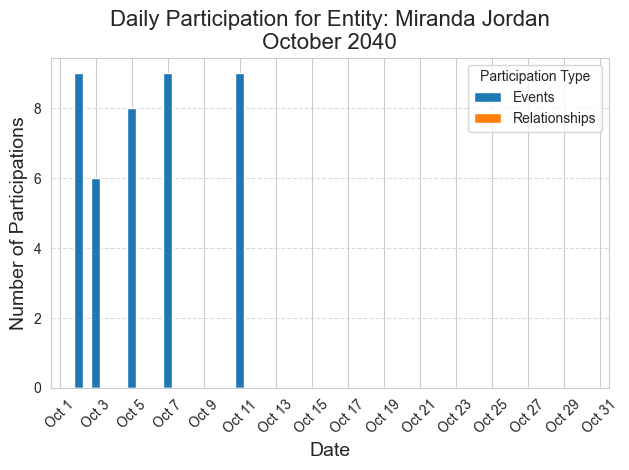


Entity Miranda Jordan Summary:
Total Event participations: 41
Total Relationship participations: 0
Most active day: Oct 2 (9 participations)


<Figure size 1400x600 with 0 Axes>

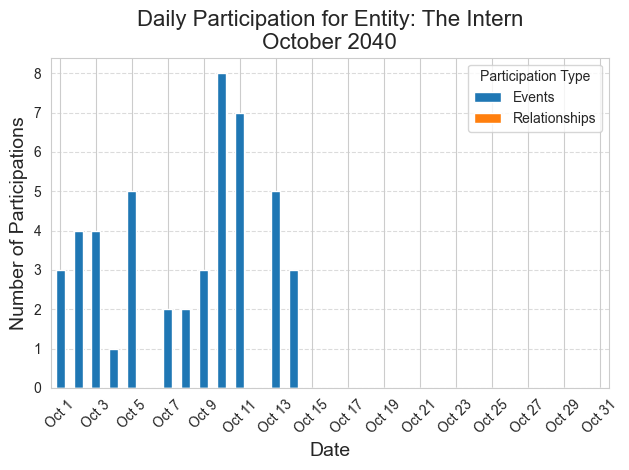


Entity The Intern Summary:
Total Event participations: 47
Total Relationship participations: 0
Most active day: Oct 10 (8 participations)


<Figure size 1400x600 with 0 Axes>

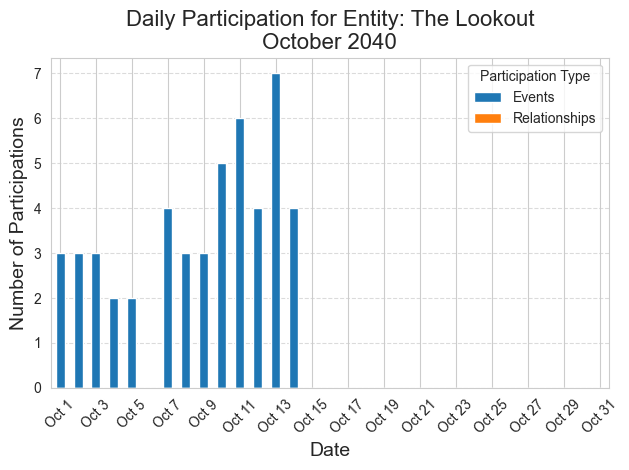


Entity The Lookout Summary:
Total Event participations: 49
Total Relationship participations: 0
Most active day: Oct 13 (7 participations)


<Figure size 1400x600 with 0 Axes>

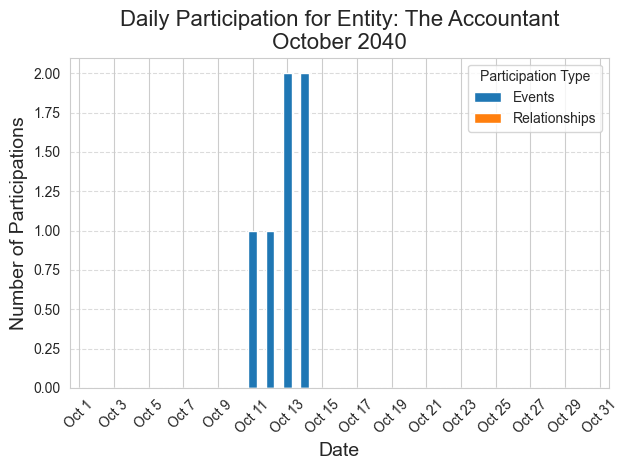


Entity The Accountant Summary:
Total Event participations: 6
Total Relationship participations: 0
Most active day: Oct 13 (2 participations)


<Figure size 1400x600 with 0 Axes>

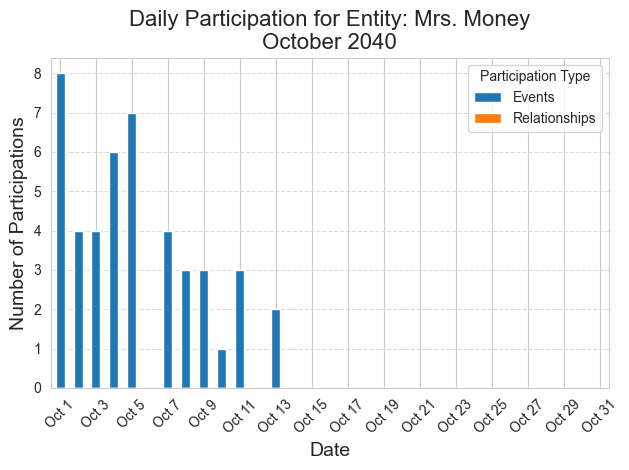


Entity Mrs. Money Summary:
Total Event participations: 45
Total Relationship participations: 0
Most active day: Oct 1 (8 participations)


<Figure size 1400x600 with 0 Axes>

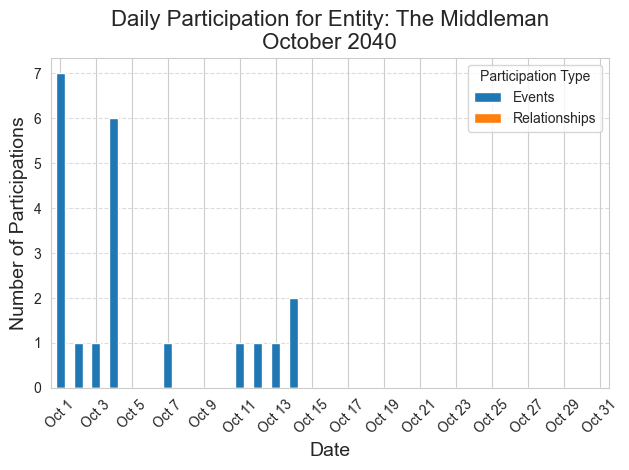


Entity The Middleman Summary:
Total Event participations: 21
Total Relationship participations: 0
Most active day: Oct 1 (7 participations)


<Figure size 1400x600 with 0 Axes>

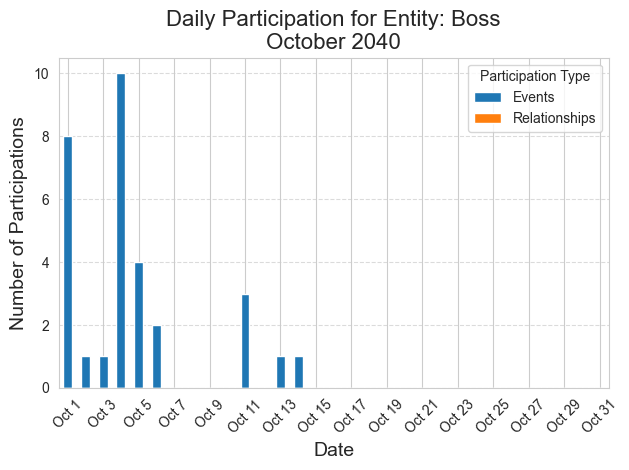


Entity Boss Summary:
Total Event participations: 31
Total Relationship participations: 0
Most active day: Oct 4 (10 participations)


<Figure size 1400x600 with 0 Axes>

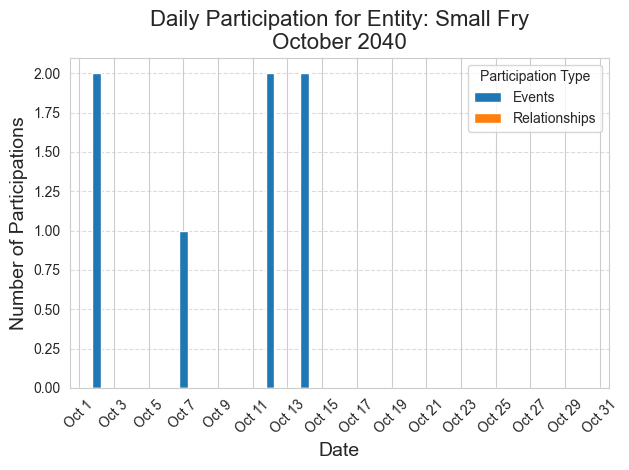


Entity Small Fry Summary:
Total Event participations: 7
Total Relationship participations: 0
Most active day: Oct 2 (2 participations)


<Figure size 1400x600 with 0 Axes>

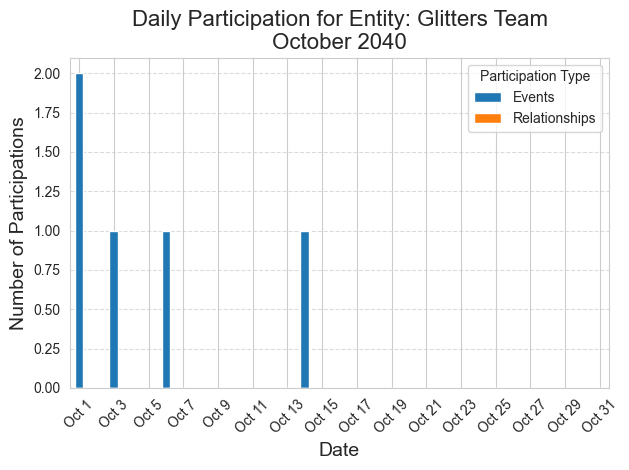


Entity Glitters Team Summary:
Total Event participations: 5
Total Relationship participations: 0
Most active day: Oct 1 (2 participations)


<Figure size 1400x600 with 0 Axes>

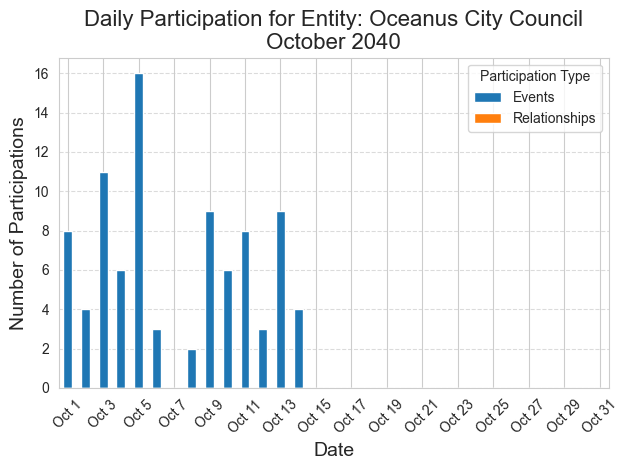


Entity Oceanus City Council Summary:
Total Event participations: 89
Total Relationship participations: 0
Most active day: Oct 5 (16 participations)


<Figure size 1400x600 with 0 Axes>

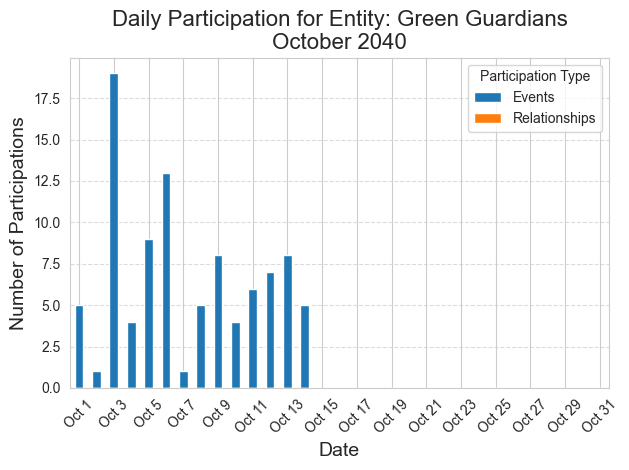


Entity Green Guardians Summary:
Total Event participations: 95
Total Relationship participations: 0
Most active day: Oct 3 (19 participations)


<Figure size 1400x600 with 0 Axes>

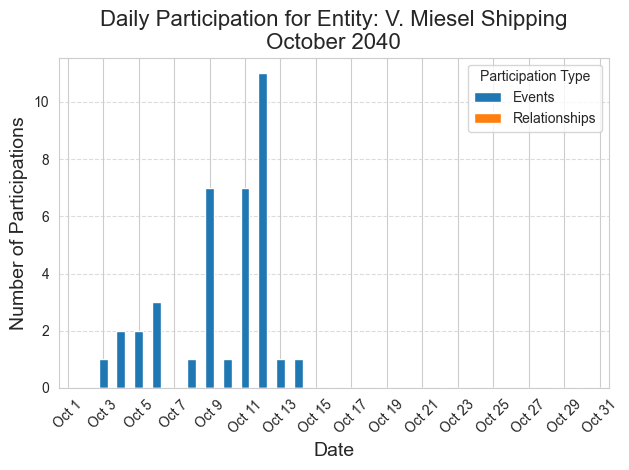


Entity V. Miesel Shipping Summary:
Total Event participations: 37
Total Relationship participations: 0
Most active day: Oct 12 (11 participations)


<Figure size 1400x600 with 0 Axes>

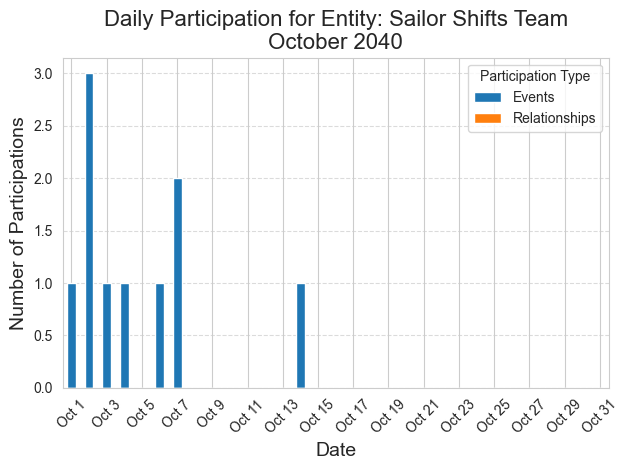


Entity Sailor Shifts Team Summary:
Total Event participations: 10
Total Relationship participations: 0
Most active day: Oct 2 (3 participations)


<Figure size 1400x600 with 0 Axes>

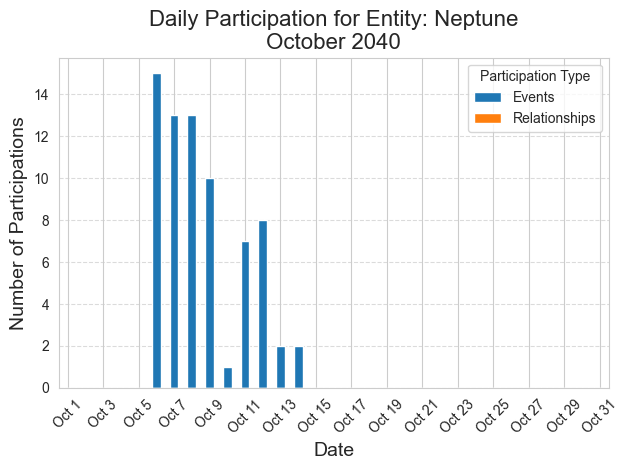


Entity Neptune Summary:
Total Event participations: 71
Total Relationship participations: 0
Most active day: Oct 6 (15 participations)


<Figure size 1400x600 with 0 Axes>

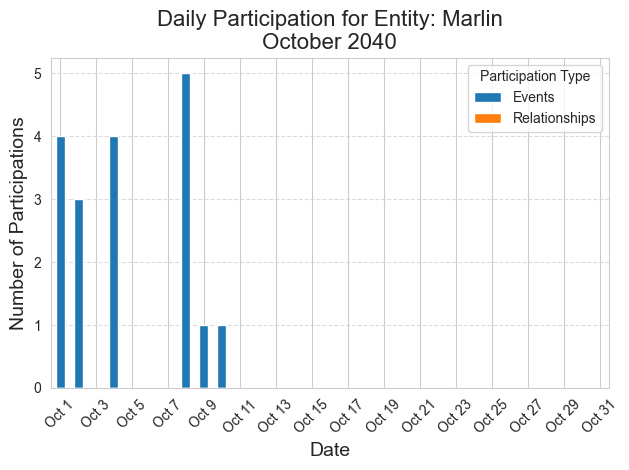


Entity Marlin Summary:
Total Event participations: 18
Total Relationship participations: 0
Most active day: Oct 8 (5 participations)


<Figure size 1400x600 with 0 Axes>

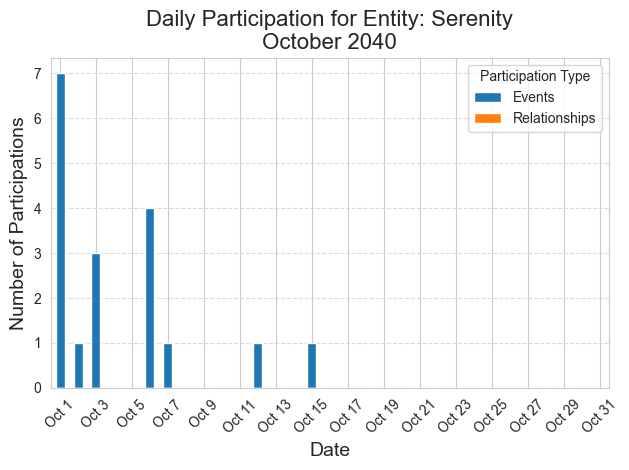


Entity Serenity Summary:
Total Event participations: 18
Total Relationship participations: 0
Most active day: Oct 1 (7 participations)


<Figure size 1400x600 with 0 Axes>

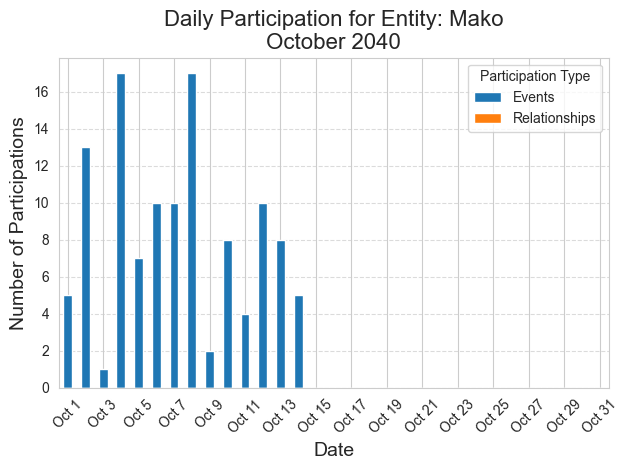


Entity Mako Summary:
Total Event participations: 117
Total Relationship participations: 0
Most active day: Oct 4 (17 participations)


<Figure size 1400x600 with 0 Axes>

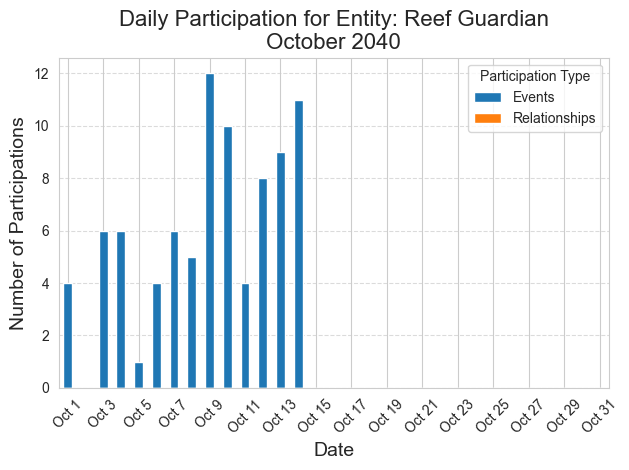


Entity Reef Guardian Summary:
Total Event participations: 86
Total Relationship participations: 0
Most active day: Oct 9 (12 participations)


<Figure size 1400x600 with 0 Axes>

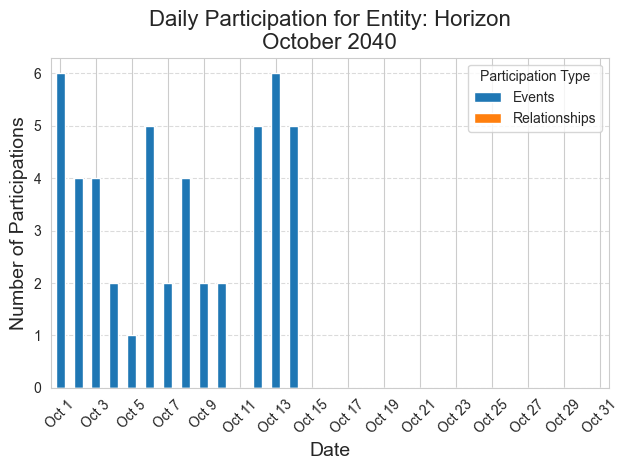


Entity Horizon Summary:
Total Event participations: 48
Total Relationship participations: 0
Most active day: Oct 1 (6 participations)


<Figure size 1400x600 with 0 Axes>

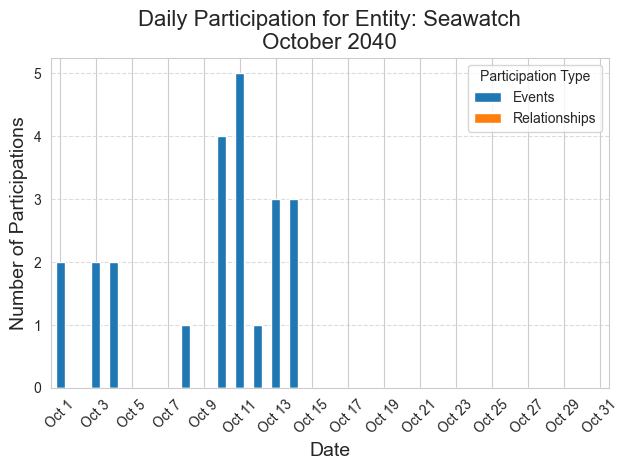


Entity Seawatch Summary:
Total Event participations: 23
Total Relationship participations: 0
Most active day: Oct 11 (5 participations)


<Figure size 1400x600 with 0 Axes>

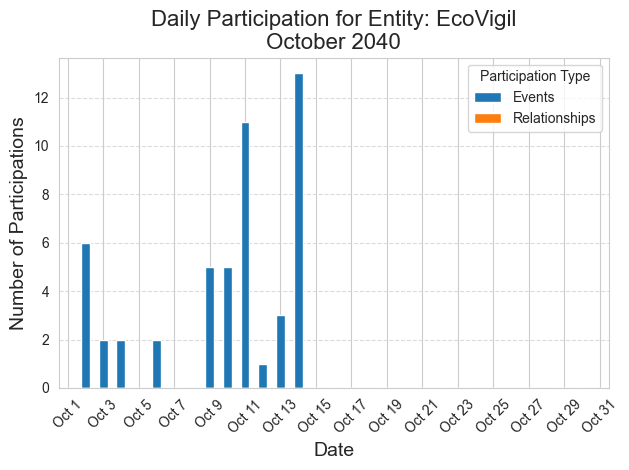


Entity EcoVigil Summary:
Total Event participations: 50
Total Relationship participations: 0
Most active day: Oct 14 (13 participations)


<Figure size 1400x600 with 0 Axes>

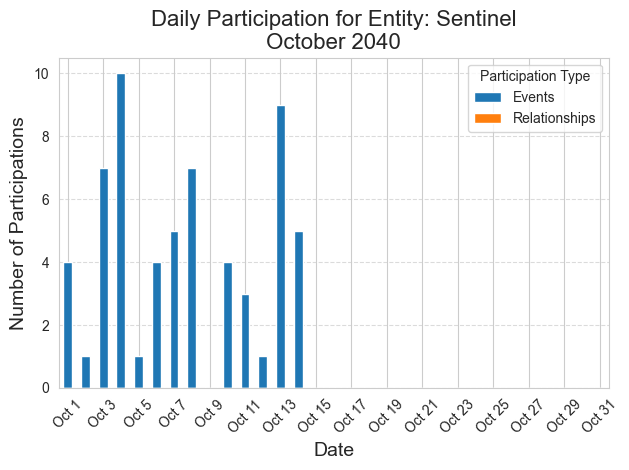


Entity Sentinel Summary:
Total Event participations: 61
Total Relationship participations: 0
Most active day: Oct 4 (10 participations)


<Figure size 1400x600 with 0 Axes>

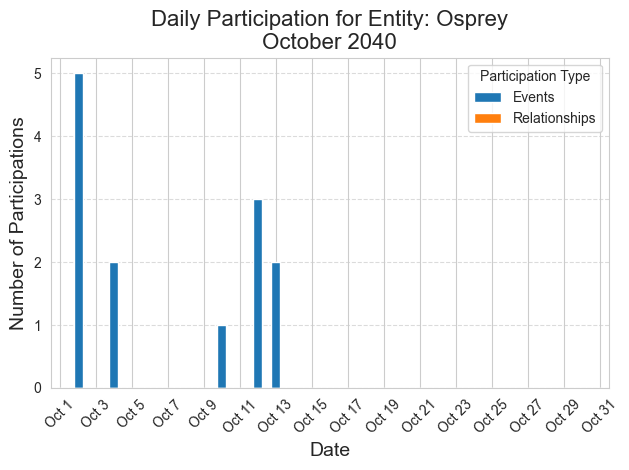


Entity Osprey Summary:
Total Event participations: 13
Total Relationship participations: 0
Most active day: Oct 2 (5 participations)


<Figure size 1400x600 with 0 Axes>

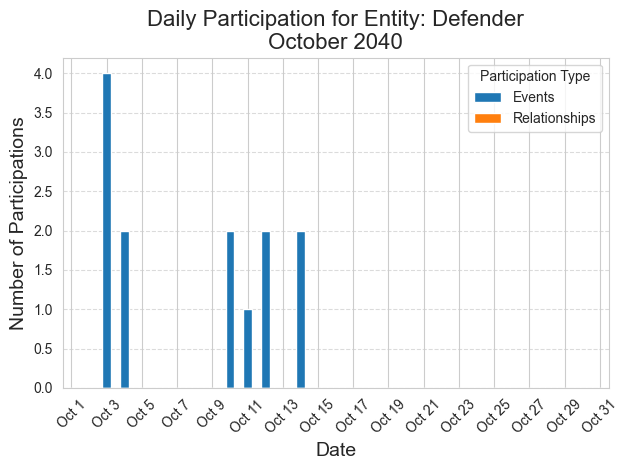


Entity Defender Summary:
Total Event participations: 13
Total Relationship participations: 0
Most active day: Oct 3 (4 participations)


<Figure size 1400x600 with 0 Axes>

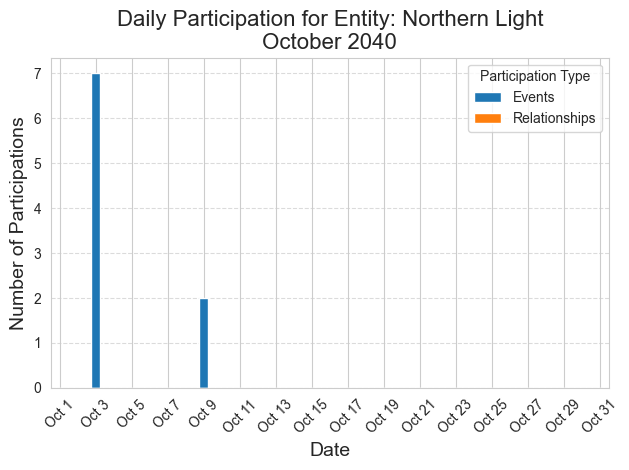


Entity Northern Light Summary:
Total Event participations: 9
Total Relationship participations: 0
Most active day: Oct 3 (7 participations)


<Figure size 1400x600 with 0 Axes>

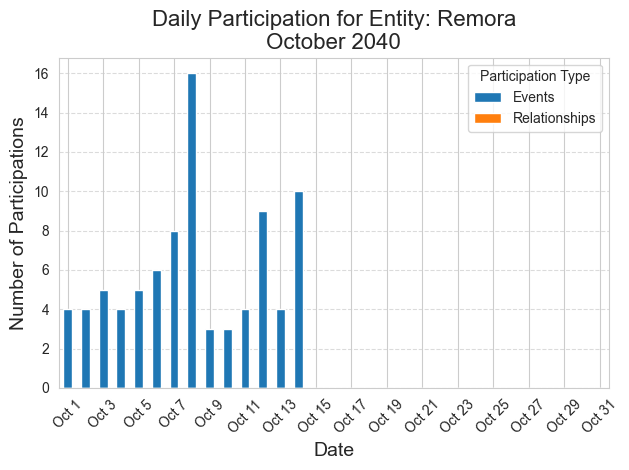


Entity Remora Summary:
Total Event participations: 85
Total Relationship participations: 0
Most active day: Oct 8 (16 participations)


<Figure size 1400x600 with 0 Axes>

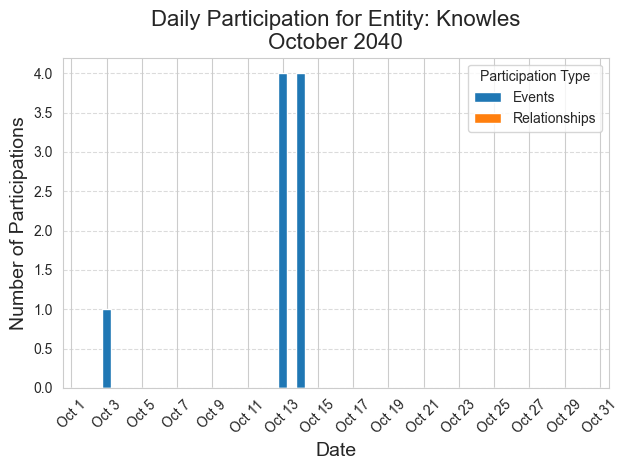


Entity Knowles Summary:
Total Event participations: 9
Total Relationship participations: 0
Most active day: Oct 13 (4 participations)


<Figure size 1400x600 with 0 Axes>

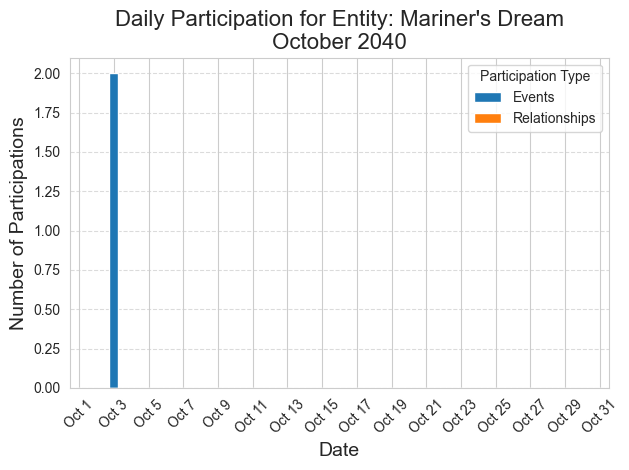


Entity Mariner's Dream Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 3 (2 participations)


<Figure size 1400x600 with 0 Axes>

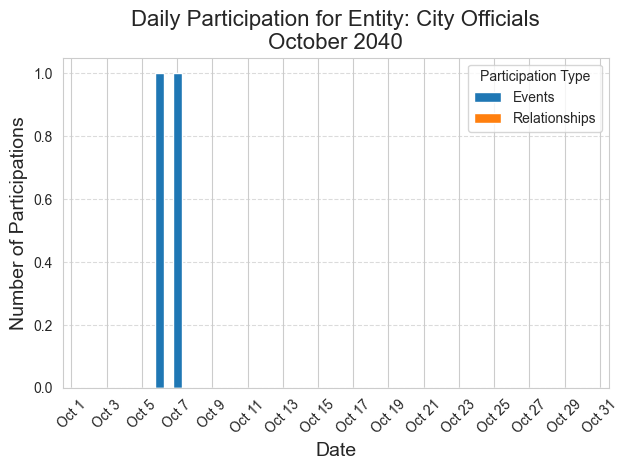


Entity City Officials Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 6 (1 participations)


<Figure size 1400x600 with 0 Axes>

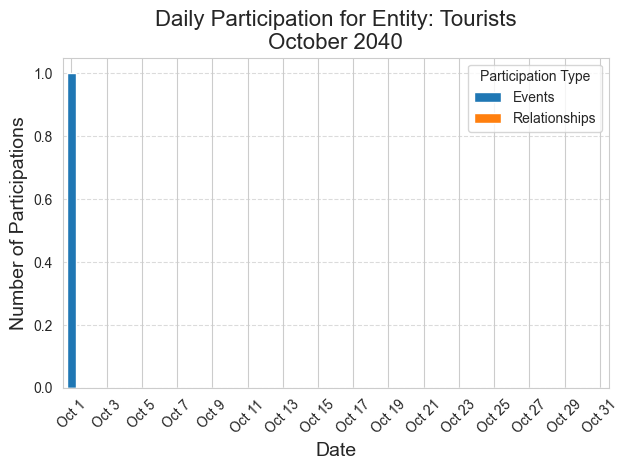


Entity Tourists Summary:
Total Event participations: 1
Total Relationship participations: 0
Most active day: Oct 1 (1 participations)


<Figure size 1400x600 with 0 Axes>

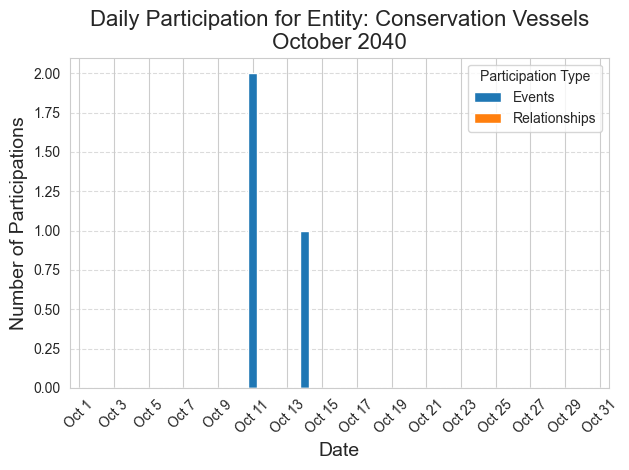


Entity Conservation Vessels Summary:
Total Event participations: 3
Total Relationship participations: 0
Most active day: Oct 11 (2 participations)


<Figure size 1400x600 with 0 Axes>

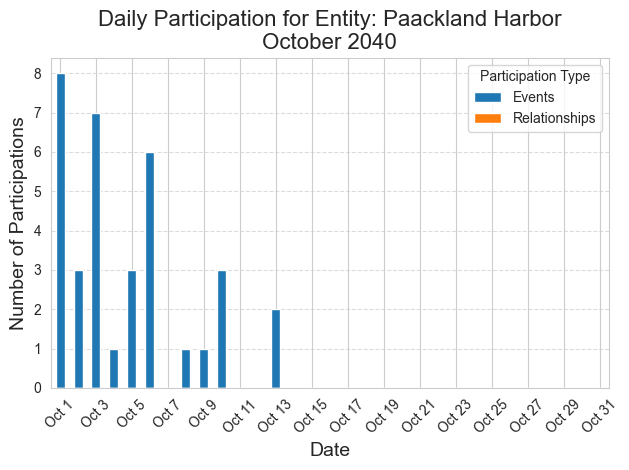


Entity Paackland Harbor Summary:
Total Event participations: 35
Total Relationship participations: 0
Most active day: Oct 1 (8 participations)


<Figure size 1400x600 with 0 Axes>

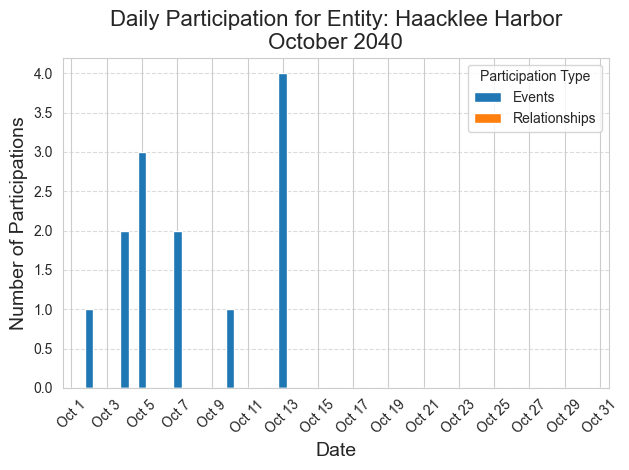


Entity Haacklee Harbor Summary:
Total Event participations: 13
Total Relationship participations: 0
Most active day: Oct 13 (4 participations)


<Figure size 1400x600 with 0 Axes>

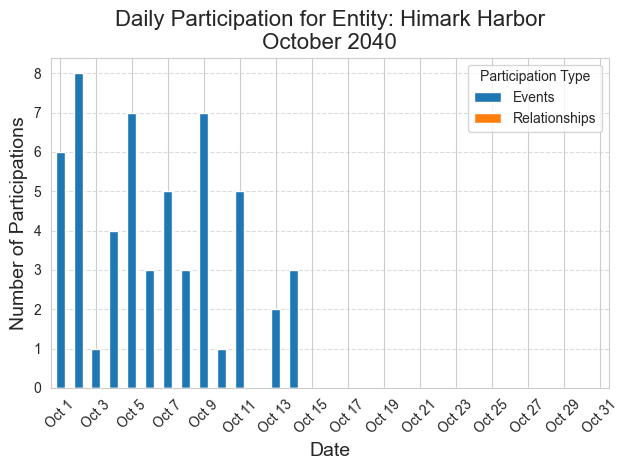


Entity Himark Harbor Summary:
Total Event participations: 55
Total Relationship participations: 0
Most active day: Oct 2 (8 participations)


<Figure size 1400x600 with 0 Axes>

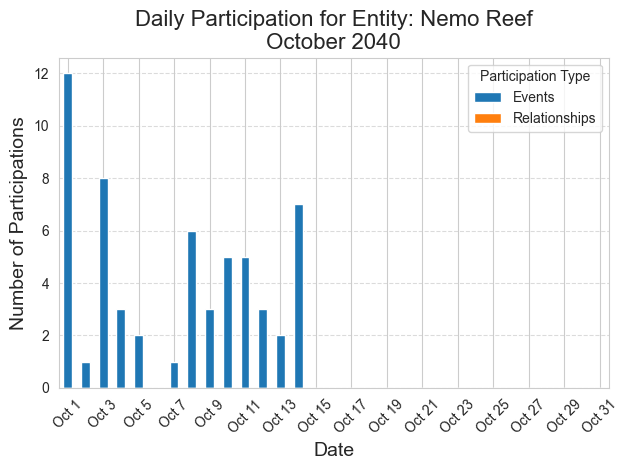


Entity Nemo Reef Summary:
Total Event participations: 58
Total Relationship participations: 0
Most active day: Oct 1 (12 participations)


<Figure size 1400x600 with 0 Axes>

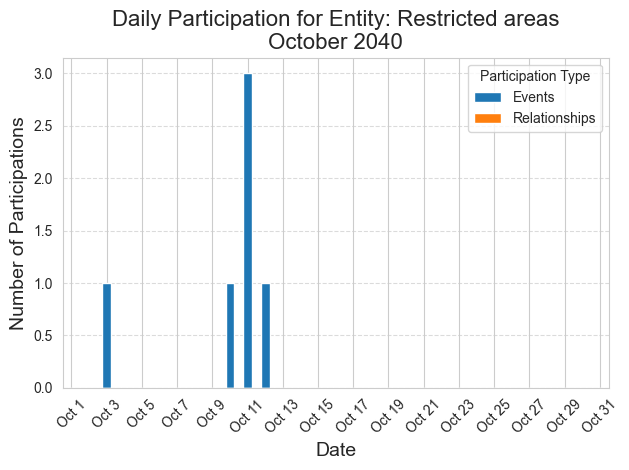


Entity Restricted areas Summary:
Total Event participations: 6
Total Relationship participations: 0
Most active day: Oct 11 (3 participations)


<Figure size 1400x600 with 0 Axes>

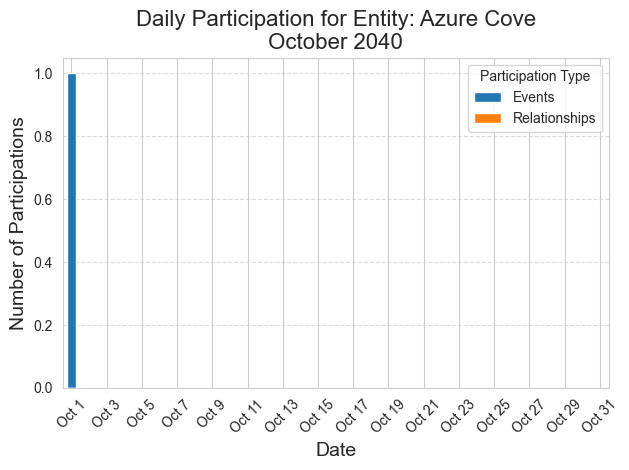


Entity Azure Cove Summary:
Total Event participations: 1
Total Relationship participations: 0
Most active day: Oct 1 (1 participations)


<Figure size 1400x600 with 0 Axes>

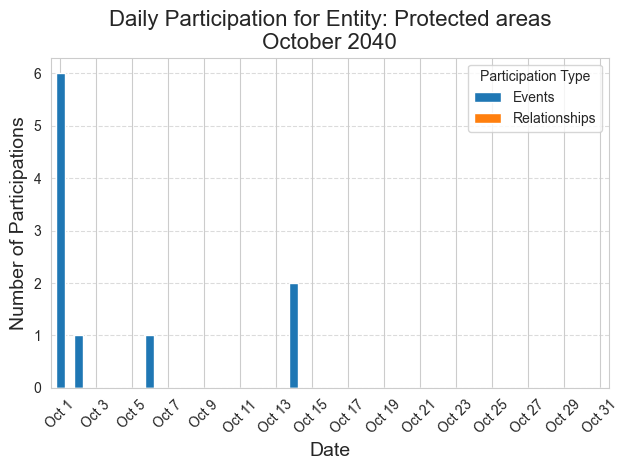


Entity Protected areas Summary:
Total Event participations: 10
Total Relationship participations: 0
Most active day: Oct 1 (6 participations)


<Figure size 1400x600 with 0 Axes>

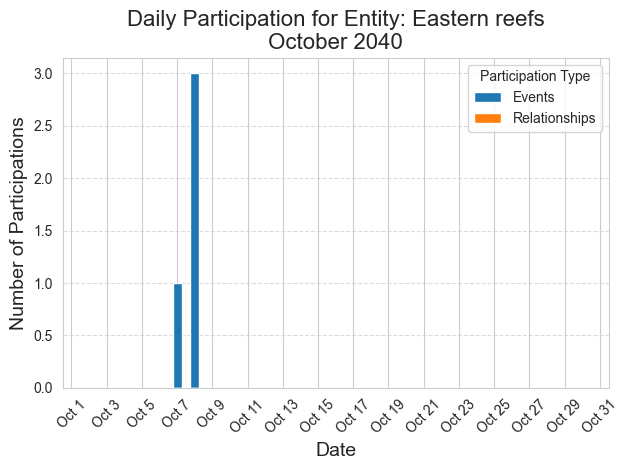


Entity Eastern reefs Summary:
Total Event participations: 4
Total Relationship participations: 0
Most active day: Oct 8 (3 participations)


<Figure size 1400x600 with 0 Axes>

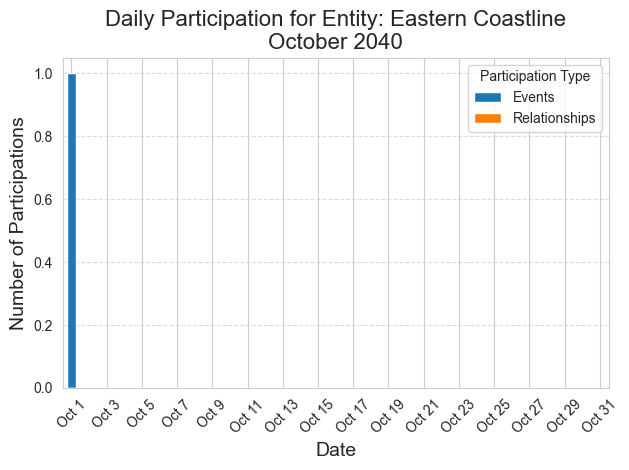


Entity Eastern Coastline Summary:
Total Event participations: 1
Total Relationship participations: 0
Most active day: Oct 1 (1 participations)


<Figure size 1400x600 with 0 Axes>

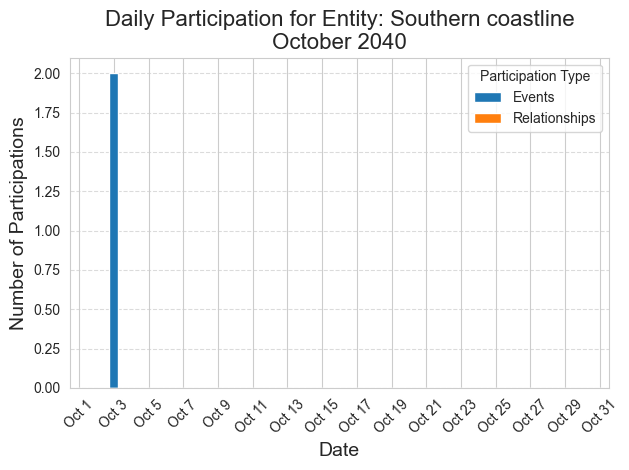


Entity Southern coastline Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 3 (2 participations)


<Figure size 1400x600 with 0 Axes>

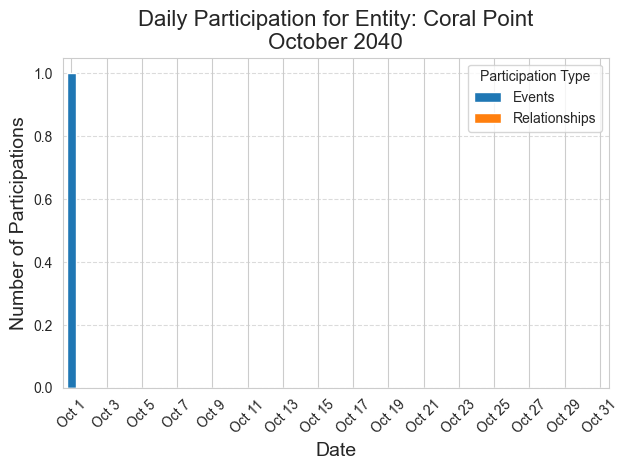


Entity Coral Point Summary:
Total Event participations: 1
Total Relationship participations: 0
Most active day: Oct 1 (1 participations)


<Figure size 1400x600 with 0 Axes>

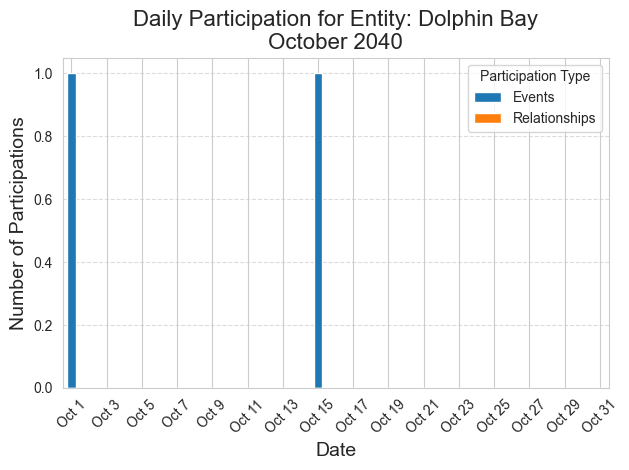


Entity Dolphin Bay Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 1 (1 participations)


<Figure size 1400x600 with 0 Axes>

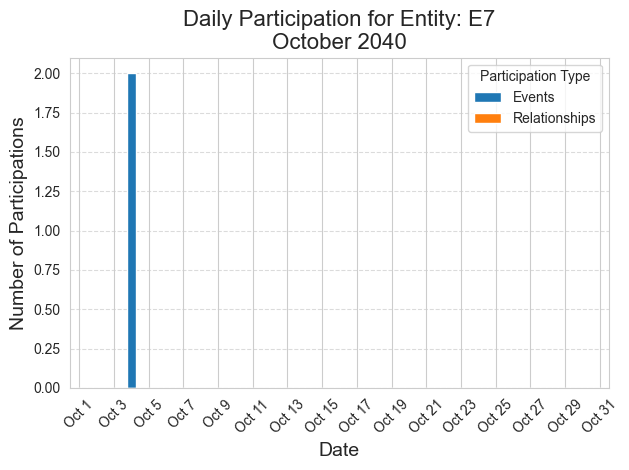


Entity E7 Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 4 (2 participations)


<Figure size 1400x600 with 0 Axes>

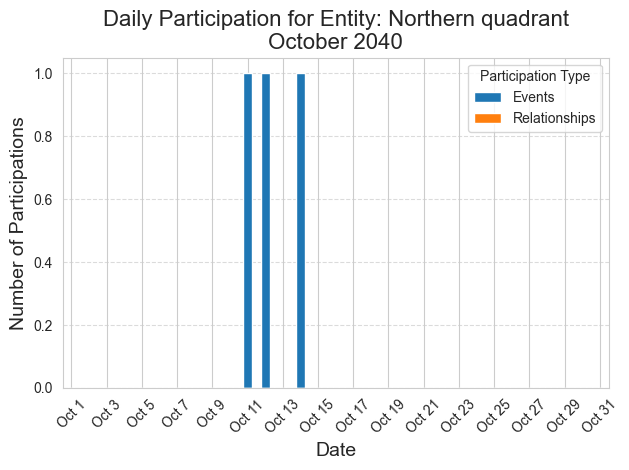


Entity Northern quadrant Summary:
Total Event participations: 3
Total Relationship participations: 0
Most active day: Oct 11 (1 participations)


<Figure size 1400x600 with 0 Axes>

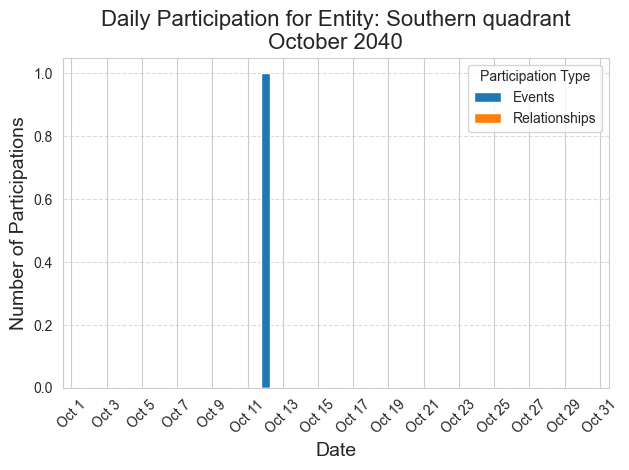


Entity Southern quadrant Summary:
Total Event participations: 1
Total Relationship participations: 0
Most active day: Oct 12 (1 participations)


<Figure size 1400x600 with 0 Axes>

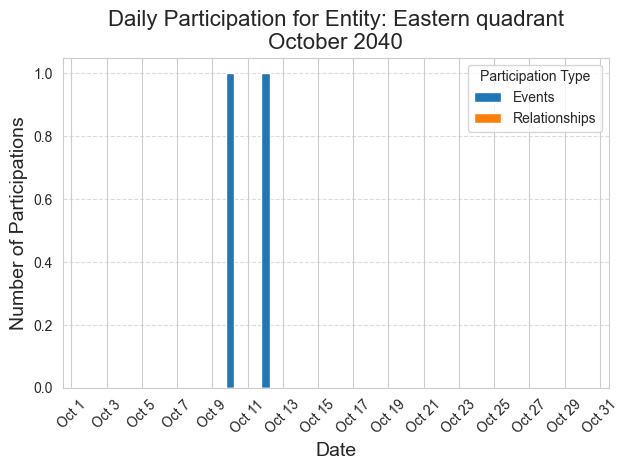


Entity Eastern quadrant Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 10 (1 participations)


<Figure size 1400x600 with 0 Axes>

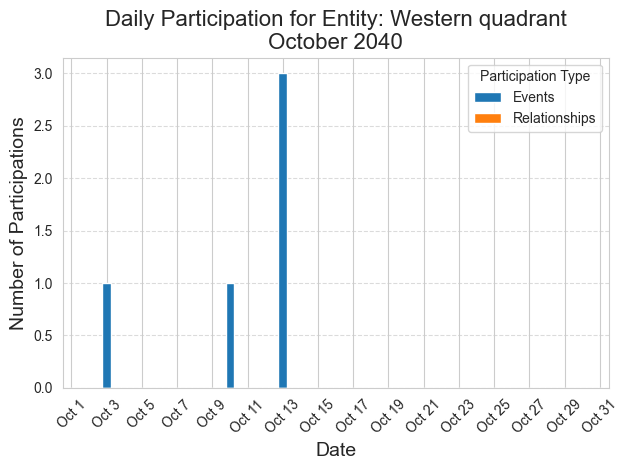


Entity Western quadrant Summary:
Total Event participations: 5
Total Relationship participations: 0
Most active day: Oct 13 (3 participations)


<Figure size 1400x600 with 0 Axes>

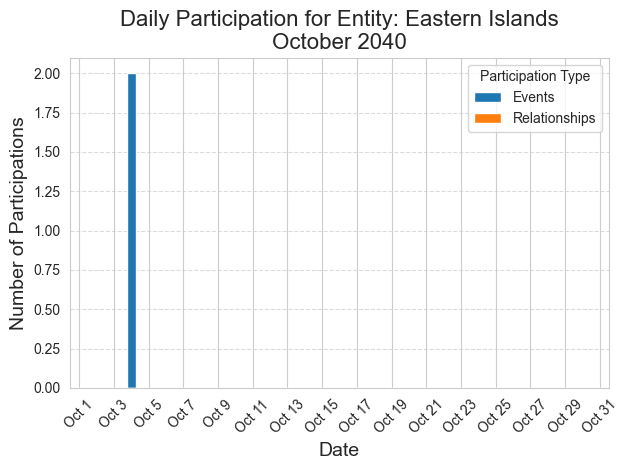


Entity Eastern Islands Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 4 (2 participations)


<Figure size 1400x600 with 0 Axes>

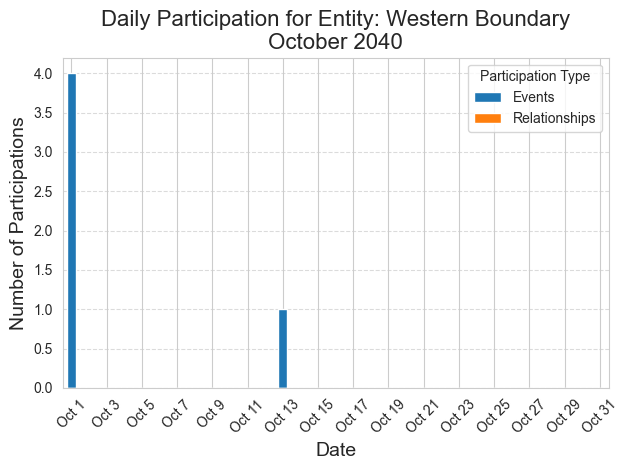


Entity Western Boundary Summary:
Total Event participations: 5
Total Relationship participations: 0
Most active day: Oct 1 (4 participations)


<Figure size 1400x600 with 0 Axes>

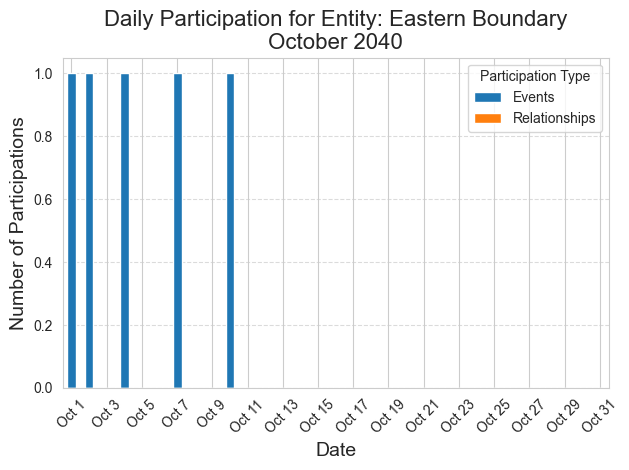


Entity Eastern Boundary Summary:
Total Event participations: 5
Total Relationship participations: 0
Most active day: Oct 1 (1 participations)


<Figure size 1400x600 with 0 Axes>

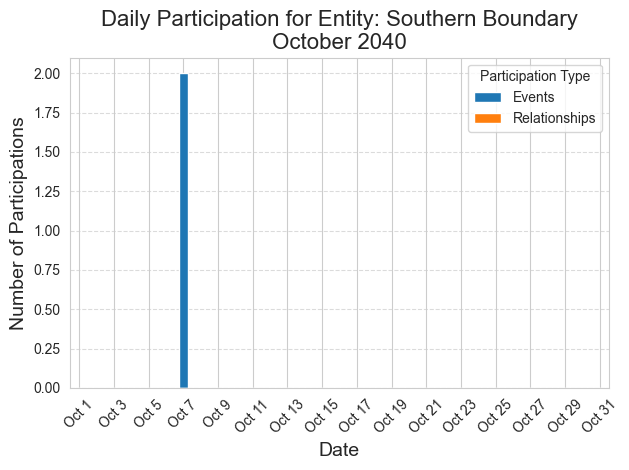


Entity Southern Boundary Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 7 (2 participations)


<Figure size 1400x600 with 0 Axes>

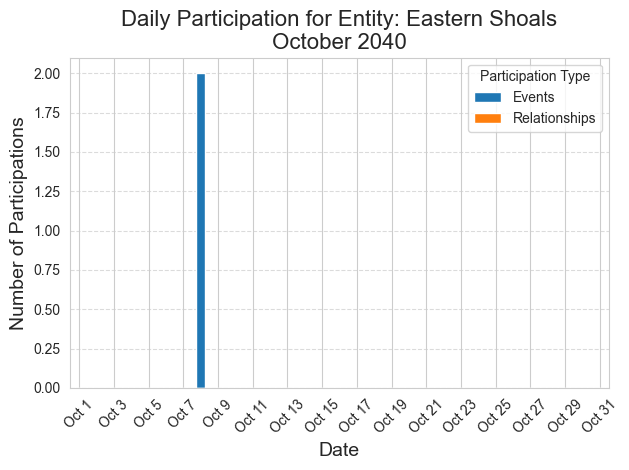


Entity Eastern Shoals Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 8 (2 participations)


<Figure size 1400x600 with 0 Axes>

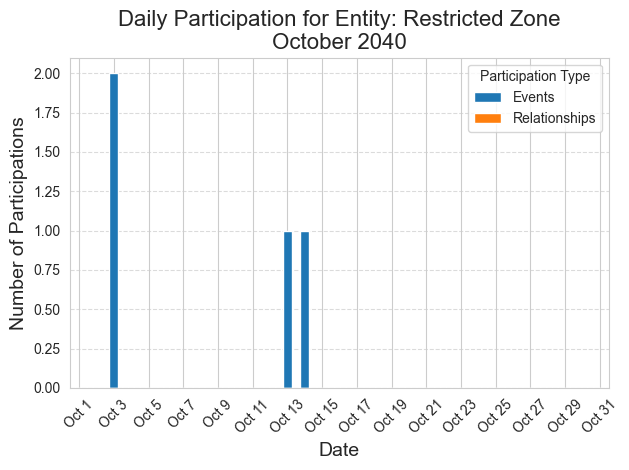


Entity Restricted Zone Summary:
Total Event participations: 4
Total Relationship participations: 0
Most active day: Oct 3 (2 participations)


<Figure size 1400x600 with 0 Axes>

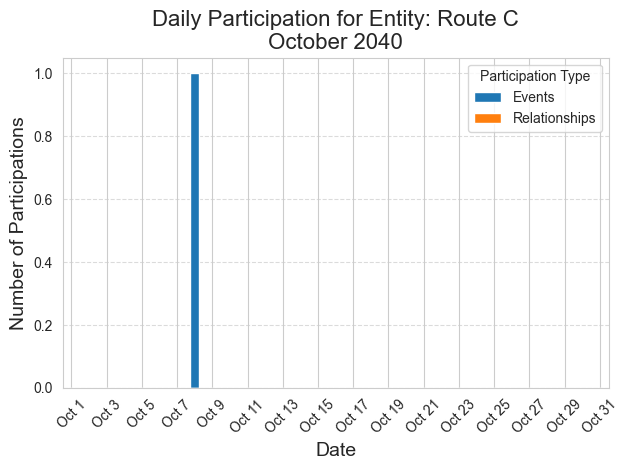


Entity Route C Summary:
Total Event participations: 1
Total Relationship participations: 0
Most active day: Oct 8 (1 participations)


<Figure size 1400x600 with 0 Axes>

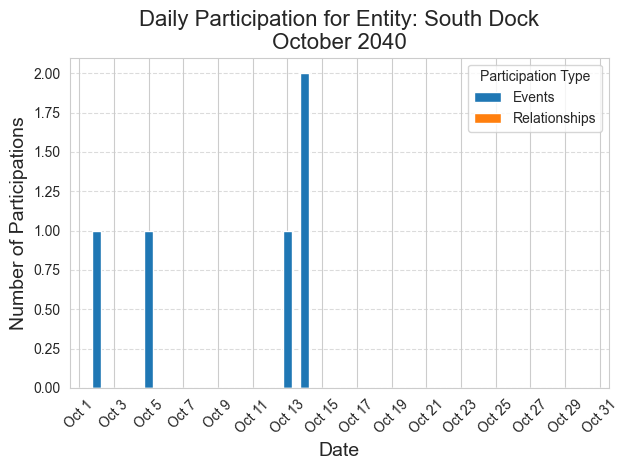


Entity South Dock Summary:
Total Event participations: 5
Total Relationship participations: 0
Most active day: Oct 14 (2 participations)


<Figure size 1400x600 with 0 Axes>

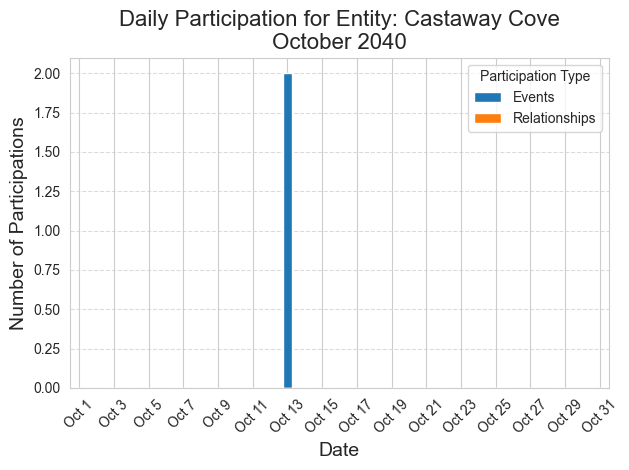


Entity Castaway Cove Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 13 (2 participations)


<Figure size 1400x600 with 0 Axes>

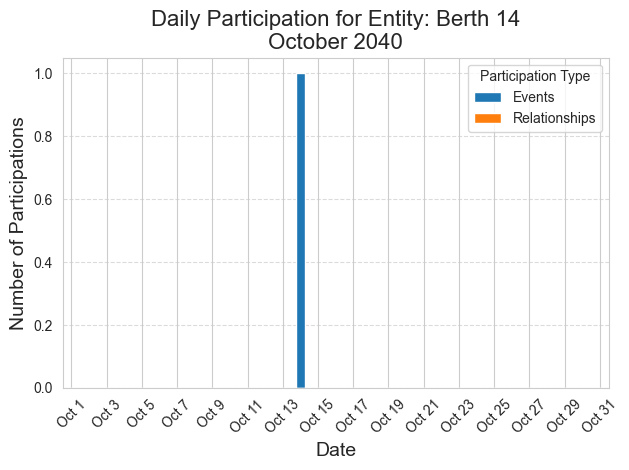


Entity Berth 14 Summary:
Total Event participations: 1
Total Relationship participations: 0
Most active day: Oct 14 (1 participations)


<Figure size 1400x600 with 0 Axes>

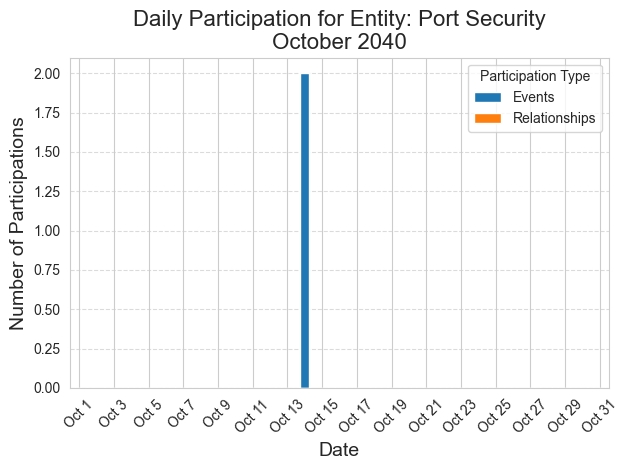


Entity Port Security Summary:
Total Event participations: 2
Total Relationship participations: 0
Most active day: Oct 14 (2 participations)


In [16]:
# Ensure we have the required columns
if all(col in nodes_df.columns for col in ['timestamp', 'id', 'type']):
    try:
        # Convert timestamp and filter for October 2040
        nodes_df['date'] = pd.to_datetime(nodes_df['timestamp']).dt.date
        oct_data = nodes_df[nodes_df['timestamp'].dt.to_period('M') == '2040-10'].copy()

        # Get all Entity nodes
        entities = nodes_df[nodes_df['type'] == 'Entity']['id'].unique()

        # Create empty dataframe to store daily participation
        date_range = pd.date_range('2040-10-01', '2040-10-31').date
        columns = pd.MultiIndex.from_product([entities, ['Events', 'Relationships']])
        daily_participation = pd.DataFrame(0, index=date_range, columns=columns)

        # Fill the participation dataframe
        for _, edge in edges_df.iterrows():
            source = edge['source']
            target = edge['target']

            # Get node types
            source_type = nodes_df.loc[nodes_df['id'] == source, 'type'].values[0] if source in nodes_df['id'].values else None
            target_type = nodes_df.loc[nodes_df['id'] == target, 'type'].values[0] if target in nodes_df['id'].values else None

            # Check if edge connects an Entity to an Event/Relationship
            if source_type == 'Entity' and target_type in ['Event', 'Relationship']:
                event_date = nodes_df.loc[nodes_df['id'] == target, 'date'].values[0]
                if pd.notna(event_date) and event_date in date_range:
                    daily_participation.loc[event_date, (source, target_type + 's')] += 1

            if target_type == 'Entity' and source_type in ['Event', 'Relationship']:
                event_date = nodes_df.loc[nodes_df['id'] == source, 'date'].values[0]
                if pd.notna(event_date) and event_date in date_range:
                    daily_participation.loc[event_date, (target, source_type + 's')] += 1

        # Filter for entities with any participation
        active_entities = [e for e in entities if daily_participation[e].sum().sum() > 0]
        daily_participation = daily_participation[active_entities]

        if not daily_participation.empty:
            # Create visualization for each entity
            for entity in active_entities:  # Show first 10 entities
                entity_data = daily_participation[entity]

                plt.figure(figsize=(14, 6))
                entity_data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

                plt.title(f'Daily Participation for Entity: {entity}\nOctober 2040', fontsize=16)
                plt.xlabel('Date', fontsize=14)
                plt.ylabel('Number of Participations', fontsize=14)
                plt.xticks(range(0, 31, 2), [f'Oct {d+1}' for d in range(0, 31, 2)], rotation=45)
                plt.legend(title='Participation Type')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()

                # Print summary for this entity
                print(f"\nEntity {entity} Summary:")
                print(f"Total Event participations: {entity_data['Events'].sum()}")
                print(f"Total Relationship participations: {entity_data['Relationships'].sum()}")
                print(f"Most active day: Oct {entity_data.sum(axis=1).idxmax().day} "
                      f"({entity_data.sum(axis=1).max()} participations)")
        else:
            print("No entity participations found in October 2040")

    except Exception as e:
        print(f"Error processing data: {str(e)}")
else:
    print("Required columns ('timestamp', 'id', or 'type') not found in nodes DataFrame")

In [17]:
# Density (sparsity of the network)
print(f"Network density: {nx.density(G):.4f}")

# Shortest path length (if the network is connected)
if nx.is_connected(G):
    print(f"Average shortest path length: {nx.average_shortest_path_length(G):.2f}")
else:
    print("Graph is not connected; cannot compute average shortest path.")

# Clustering coefficient
print(f"Average clustering coefficient: {nx.average_clustering(G):.2f}")

Network density: 0.0048
Average shortest path length: 3.85
Average clustering coefficient: 0.29


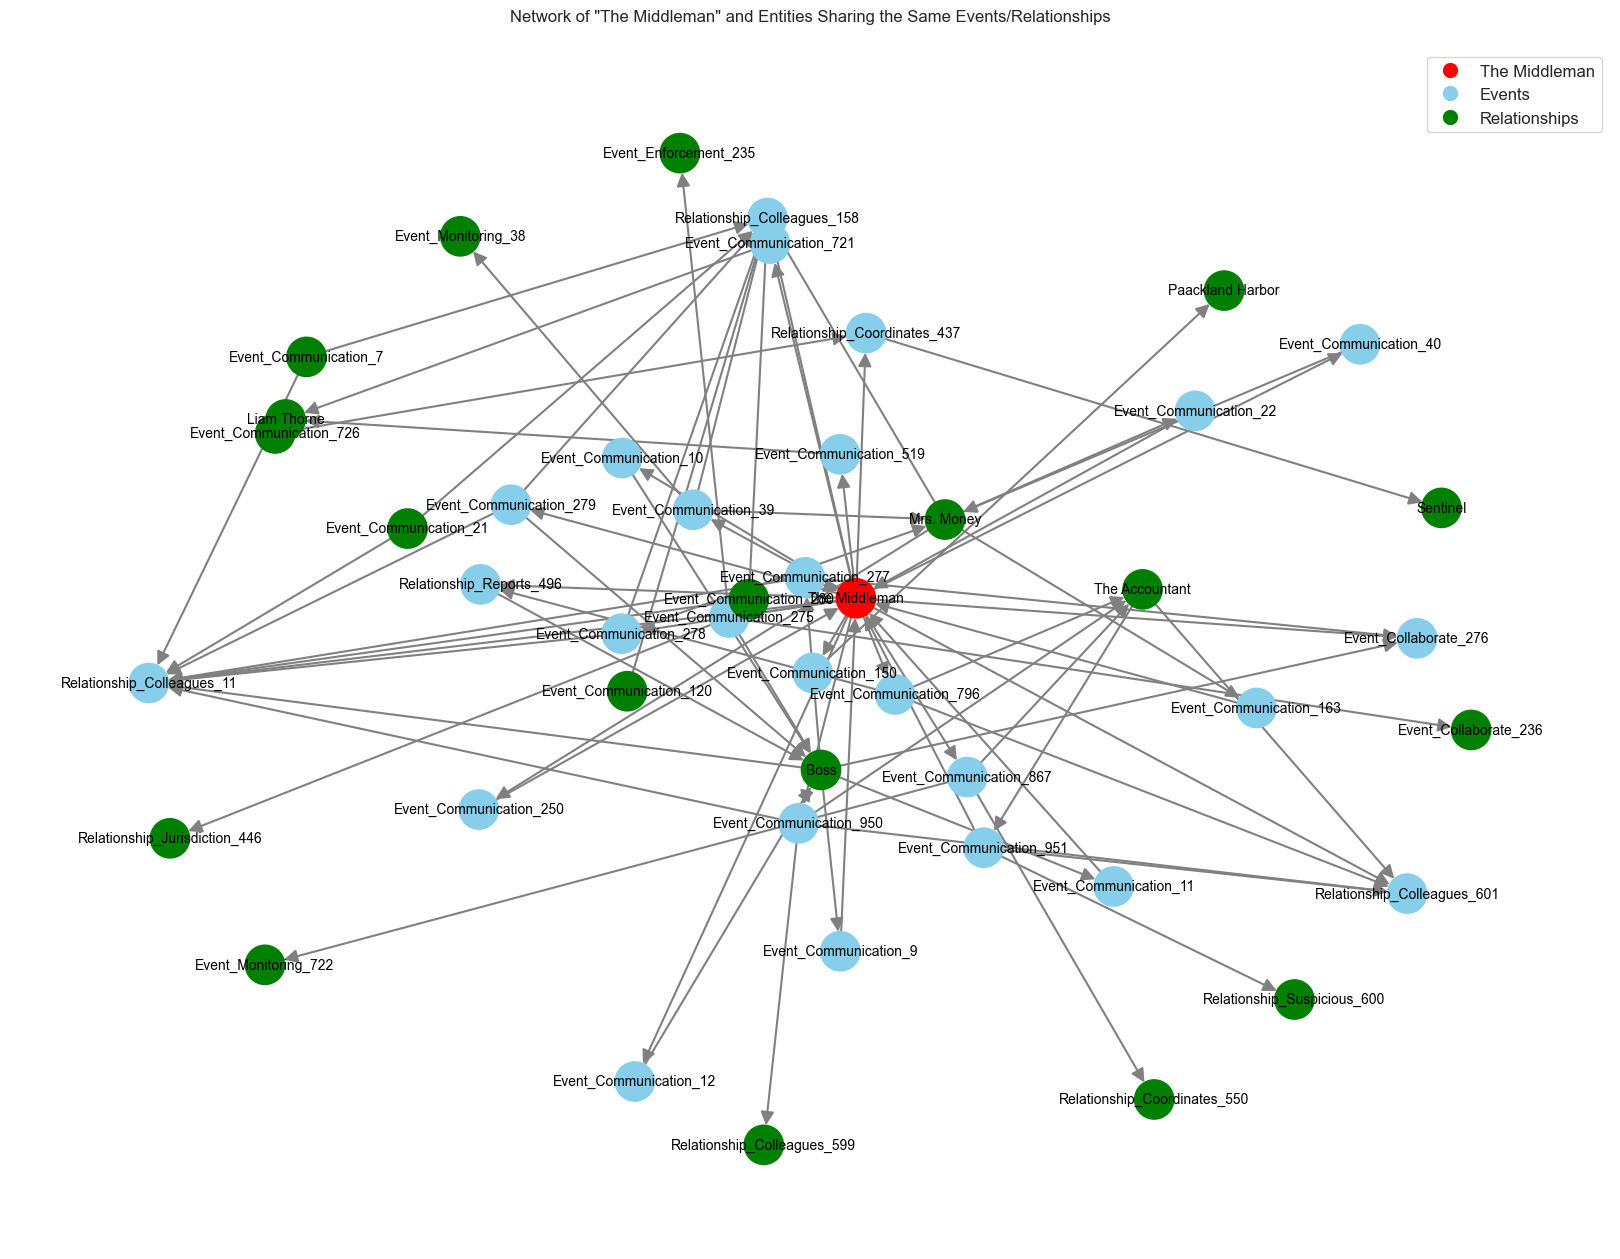

In [18]:
target_entity = "The Middleman"  # Replace with exact name if needed

# Step 1: Get all Events/Relationships connected to "The Middleman"
middleman_edges = edges_df[
    (edges_df['source'] == target_entity) |
    (edges_df['target'] == target_entity)
]
connected_events_rels = set(middleman_edges['source']).union(set(middleman_edges['target'])) - {target_entity}

# Step 2: Find OTHER entities connected to the SAME Events/Relationships
shared_entities = set()
for event_rel in connected_events_rels:
    # Entities connected to this Event/Relationship (excluding "The Middleman")
    entities_source = edges_df[((edges_df['source'] == event_rel) & (edges_df['target'] != target_entity))]['target'].tolist()

    entities_target = edges_df[
        ((edges_df['target'] == event_rel) & (edges_df['source'] != target_entity))
    ]['source'].tolist()

    shared_entities.update(entities_source + entities_target)

# Step 3: Create a directed subgraph
G_shared = nx.DiGraph()

# Add nodes
G_shared.add_node(target_entity)
G_shared.add_nodes_from(connected_events_rels)
G_shared.add_nodes_from(shared_entities)

# Add edges
for _, edge in edges_df[
    (edges_df['source'].isin([target_entity] + list(connected_events_rels))) |
    (edges_df['target'].isin([target_entity] + list(connected_events_rels)))
].iterrows():
    G_shared.add_edge(edge['source'], edge['target'], type=edge.get('type', 'Unknown'))

# Step 4: Customize node/edge styling
node_colors = []
node_labels = {}
for node in G_shared.nodes():
    if node == target_entity:
        node_colors.append('red')  # "The Middleman"
        node_labels[node] = node
    elif node in connected_events_rels:
        node_colors.append('skyblue')  # Events/Relationships
        node_labels[node] = node
    else:
        node_colors.append('green')  # Other entities sharing connections
        node_labels[node] = node

edge_colors = [
    'orange' if G_shared.edges[edge].get('type', '') == 'Relationship'
    else 'gray'
    for edge in G_shared.edges()
]

# Step 5: Plot
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G_shared, k=0.7, seed=42)

nx.draw(
    G_shared, pos,
    labels=node_labels,
    node_color=node_colors,
    node_size=800,
    edge_color=edge_colors,
    arrows=True,
    arrowsize=20,
    font_size=10,
    width=1.5,
)

# Legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='The Middleman', markersize=12, markerfacecolor='red'),
    plt.Line2D([0], [0], marker='o', color='w', label='Events', markersize=12, markerfacecolor='skyblue'),
    plt.Line2D([0], [0], marker='o', color='w', label='Relationships', markersize=12, markerfacecolor='green'),
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.title(f'Network of "{target_entity}" and Entities Sharing the Same Events/Relationships', pad=20)
plt.show()